# Before we start

In [159]:
#Imports
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import plotly.plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

# The Challenge : Cover Type Prediction of Forests

In this competition you are asked to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

Natural resource managers responsible for developing 
ecosystem management strategies require basic descriptive 
information including inventory data for forested lands to 
support their decision-making processes. However, managers 
generally do not have this type of data for inholdings or 
neighboring lands that are outside their immediate 
jurisdiction. One method of obtaining this information is 
through the use of predictive models. 

The study area included four wilderness areas found in 
the Roosevelt National Forest of northern Colorado. A total 
of twelve cartographic measures were utilized as independent 
variables in the predictive models, while seven major forest 
cover types were used as dependent variables. Several subsets 
of these variables were examined to determine the best overall 
predictive model.

File descriptions : 
- train-set.csv : the training set
- test-set.csv :the test set
- submission-ecample.csv : a sample submission file in the correct format

Data descriptions

Predicting forest cover type from cartographic variables only
(no remotely sensed data). The actual forest cover type for
a given observation (30 x 30 meter cell) was determined from
US Forest Service (USFS) Region 2 Resource Information System 
(RIS) data. Independent variables were derived from data
originally obtained from US Geological Survey (USGS) and
USFS data. Data is in raw form (not scaled) and contains
binary (0 or 1) columns of data for qualitative independent
variables (wilderness areas and soil types).

This study area includes four wilderness areas located in the
Roosevelt National Forest of northern Colorado. These areas
represent forests with minimal human-caused disturbances,
so that existing forest cover types are more a result of 
ecological processes rather than forest management practices.

Some background information for these four wilderness areas: 
Neota (area 2) probably has the highest mean elevational value of 
the 4 wilderness areas. Rawah (area 1) and Comanche Peak (area 3) 
would have a lower mean elevational value, while Cache la Poudre 
(area 4) would have the lowest mean elevational value.

As for primary major tree species in these areas, Neota would have 
spruce/fir (type 1), while Rawah and Comanche Peak would probably
have lodgepole pine (type 2) as their primary species, followed by 
spruce/fir and aspen (type 5). Cache la Poudre would tend to have 
Ponderosa pine (type 3), Douglas-fir (type 6), and 
cottonwood/willow (type 4).

The Rawah and Comanche Peak areas would tend to be more typical of 
the overall dataset than either the Neota or Cache la Poudre, due 
to their assortment of tree species and range of predictive 
variable values (elevation, etc.) Cache la Poudre would probably 
be more unique than the others, due to its relatively low 
elevation range and species composition.


Number of Attributes: 12 measures, but 54 columns of data
(10 quantitative variables, 4 binary
wilderness areas and 40 binary
soil type variables)


Attribute information:

Given is the attribute name, attribute type, the measurement unit and
a brief description. The forest cover type is the classification 
problem. The order of this listing corresponds to the order of 
numerals along the rows of the database.

Name Data Type Measurement Description

- Elevation quantitative meters Elevation in meters
- Aspect quantitative azimuth Aspect in degrees azimuth
- Slope quantitative degrees Slope in degrees
- Horizontal_Distance_To_Hydrology quantitative meters Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology quantitative meters Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways quantitative meters Horz Dist to nearest roadway
- Hillshade_9am quantitative 0 to 255 index Hillshade index at 9am, summer solstice
- Hillshade_Noon quantitative 0 to 255 index Hillshade index at noon, summer soltice
- Hillshade_3pm quantitative 0 to 255 index Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points quantitative meters Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns) qualitative 0 (absence) or 1 (presence) Wilderness area designation
- Soil_Type (40 binary columns) qualitative 0 (absence) or 1 (presence) Soil Type designation
- Cover_Type (7 types) integer 1 to 7 Forest Cover Type designation

Code Designations:

Wilderness Areas:

- 1 -- Rawah Wilderness Area
- 2 -- Neota Wilderness Area
- 3 -- Comanche Peak Wilderness Area
- 4 -- Cache la Poudre Wilderness Area

Soil Types: 1 to 40 : based on the USFS Ecological
Landtype Units (ELUs) for this study area:

Study Code USFS ELU Code Description
- 1 2702 Cathedral family - Rock outcrop complex, extremely stony.
- 2 2703 Vanet - Ratake families complex, very stony.
- 3 2704 Haploborolis - Rock outcrop complex, rubbly.
- 4 2705 Ratake family - Rock outcrop complex, rubbly.
- 5 2706 Vanet family - Rock outcrop complex complex, rubbly.
- 6 2717 Vanet - Wetmore families - Rock outcrop complex, stony.
- 7 3501 Gothic family.
- 8 3502 Supervisor - Limber families complex.
- 9 4201 Troutville family, very stony.
- 10 4703 Bullwark - Catamount families - Rock outcrop complex, rubbly.
- 11 4704 Bullwark - Catamount families - Rock land complex, rubbly.
- 12 4744 Legault family - Rock land complex, stony.
- 13 4758 Catamount family - Rock land - Bullwark family complex, rubbly.
- 14 5101 Pachic Argiborolis - Aquolis complex.
- 15 5151 unspecified in the USFS Soil and ELU Survey.
- 16 6101 Cryaquolis - Cryoborolis complex.
- 17 6102 Gateview family - Cryaquolis complex.
- 18 6731 Rogert family, very stony.
- 19 7101 Typic Cryaquolis - Borohemists complex.
- 20 7102 Typic Cryaquepts - Typic Cryaquolls complex.
- 21 7103 Typic Cryaquolls - Leighcan family, till substratum complex.
- 22 7201 Leighcan family, till substratum, extremely bouldery.
- 23 7202 Leighcan family, till substratum - Typic Cryaquolls complex.
- 24 7700 Leighcan family, extremely stony.
- 25 7701 Leighcan family, warm, extremely stony.
- 26 7702 Granile - Catamount families complex, very stony.
- 27 7709 Leighcan family, warm - Rock outcrop complex, extremely stony.
- 28 7710 Leighcan family - Rock outcrop complex, extremely stony.
- 29 7745 Como - Legault families complex, extremely stony.
- 30 7746 Como family - Rock land - Legault family complex, extremely stony.
- 31 7755 Leighcan - Catamount families complex, extremely stony.
- 32 7756 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
- 33 7757 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
- 34 7790 Cryorthents - Rock land complex, extremely stony.
- 35 8703 Cryumbrepts - Rock outcrop - Cryaquepts complex.
- 36 8707 Bross family - Rock land - Cryumbrepts complex, extremely stony.
- 37 8708 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
- 38 8771 Leighcan - Moran families - Cryaquolls complex, extremely stony.
- 39 8772 Moran family - Cryorthents - Leighcan family complex, extremely stony.
- 40 8776 Moran family - Cryorthents - Rock land complex, extremely stony.

Note: First digit: climatic zone Second digit: geologic zones
1. lower montane dry 1. alluvium
2. lower montane 2. glacial
3. montane dry 3. shale
4. montane 4. sandstone
5. montane dry and montane 5. mixed sedimentary
6. montane and subalpine 6. unspecified in the USFS ELU Survey
7. subalpine 7. igneous and metamorphic
8. alpine 8. volcanic

The third and fourth ELU digits are unique to the mapping unit 
and have no special meaning to the climatic or geologic zones.

Forest Cover Type Classes: 
- 1 -- Spruce/Fir
- 2 -- Lodgepole Pine
- 3 -- Ponderosa Pine
- 4 -- Cottonwood/Willow
- 5 -- Aspen
- 6 -- Douglas-fir
- 7 -- Krummholz

For further information: https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info

The Kaggle can be found here : https://www.kaggle.com/c/sd701-cover-type-prediction-of-forests/leaderboard

# The Approach

The approach I am building in this notebook is a classification model selection. I am using Sklearn in the Python environment.

As we have separate Train and Test files, we do not have to split the data into Train and Test, and we can train the whole model on the X and y matrices using a simple ParamGrid Cross Validation.

However, as the file is pretty large, I have decided to explore a Train Test Split approach on a small sample in order to reduce the number of candidate models. The results are presented in the Train Test Split section.

Once the best models have been identified, I will explore further one model on the whole sample with a larger ParamGridCV, or build an ensemble model using a hard voting Classifier for example.

*NB*: I have decided to implement the model in a Jupyter Notebook in Python to be able to try some XGBoost and ExtraTrees classification techniques as Sk-learn offers a broader range of algorithms. I have also decided to go for some experimental data visualization. 

**Summary** :
Feature Engineering and Data Cleaning :
- Drop outliers according to Tukey's method
- Identify the most significant features
- As I am using trees later, I tried to create linearity between the most significant feature and others
- Extrapolate for missing values in the HillShade 3PM variable using the mean of the column
- Create a column Slope Hydrology = SQRT(Vertical_Distance_To_Hydrology^2 + Horizontal_Distance_To_Hydrology^2)
- Create an average distance to Hydrology, Fire Points, Roadways

Model Selection :
- Naïve Bayes
- Logistic Regression
- Decision Tree
- Random Forest
- Extra Trees
- K-nearest neighbors
- Gradient Descent
- Gradient Boosting
- XGBoost
- AdaBoost
- SVM
- LDA
- QDA
- Multi-Layer-Perceptron

Selected Model :
- Features importance
- Hyper parameter tuning
- Export the prediction

I have tested many models, but the whole process was rather a way to discover the library of Sk-Learn rather than actually trying to optimize all those models.


# Load and Explore

### Load the datas

In [160]:
train_data = pd.read_csv("train-set.csv", header='infer')
train_data = train_data.set_index('Id') #The Id column will be our index
test_data = pd.read_csv("test-set.csv", header='infer')
test_data = test_data.set_index('Id')
train_data.head(10)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
Id                                                               
1        2611     326     20                               120   
2        2772     324     17                                42   
3        2764       4     14                               480   
4        3032     342      9                                60   
5        2488      23     11                               117   
6        2968      83      8                               390   
7        3027      11      6                               534   
8        3216     277      9                                67   
9        3242     262      5                               849   
10       3315      61     15                               120   

    Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
Id                                                                    
1                               27                             1597   
2                                7                             1814   
3                              -21                              700   
4                                8                             4050   
5                               21                             1117   
6                               19                             4253   
7                               47                             1248   
8                               23                             5430   
9                              169                             1672   
10                              -6                             3042   

    Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
Id                                                 
1             168             214            184   
2             175             220            183   
3             201             212            148   
4             202             227            164   
5             209             218            151   
6             232             226            127   
7             214             228            151   
8             212             236            169   
9             207             242            173   
10            231             208            106   

    Horizontal_Distance_To_Fire_Points     ...      Soil_Type32  Soil_Type33  \
Id                                         ...                                 
1                                 2913     ...                0            0   
2                                 2879     ...                0            0   
3                                  700     ...                0            0   
4                                 2376     ...                0            0   
5                                 1136     ...                0            0   
6                                 4570     ...                0            0   
7                                 2388     ...                0            0   
8                                 2373     ...                0            0   
9                                  691     ...                0            0   
10                                1832     ...                0            0   

    Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
Id                                                                    
1             0            0            0            0            0   
2             0            0            0            0            0   
3             0            0            0            0            0   
4             0            0            0            0            0   
5             0            0            0            0            0   
6             0            0            0            0            0   
7             0            0            0            0            0   
8             0            0            0            0            0   
9             0            0            0            0        

In [161]:
#Show the size of our data
print('Train data size : ' + str(train_data.shape))
print('Test data size : ' + str(test_data.shape))

Train data size : (528720, 55)
Test data size : (226595, 54)


### Data Exploration

In [162]:
round(train_data.describe(),2)

Elevation     Aspect     Slope  Horizontal_Distance_To_Hydrology  \
count  528720.00  528720.00  528720.0                         528720.00   
mean     2959.80     155.63      14.1                            269.73   
std       280.35     112.10       7.5                            213.07   
min      1759.00     -72.00      -3.0                           -144.00   
25%      2809.00      58.00       9.0                            108.00   
50%      2996.00     127.00      13.0                            223.00   
75%      3163.00     260.00      18.0                            387.00   
max      3957.00     440.00      65.0                           1397.00   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
count                       528720.00                        528720.00   
mean                            46.47                          2352.60   
std                             58.43                          1563.56   
min                           -182.00                          -805.00   
25%                              7.00                          1106.00   
50%                             30.00                          2001.00   
75%                             69.00                          3333.00   
max                            601.00                          7577.00   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
count      528720.00       528720.00      528720.00   
mean          212.15          223.34         142.56   
std            26.79           19.81          38.34   
min            -2.00            0.00         -17.00   
25%           198.00          213.00         119.00   
50%           218.00          226.00         143.00   
75%           231.00          237.00         168.00   
max           268.00          266.00         259.00   

       Horizontal_Distance_To_Fire_Points     ...      Soil_Type32  \
count                           528720.00     ...        528720.00   
mean                              1979.36     ...             0.09   
std                               1325.88     ...             0.29   
min                               -704.00     ...             0.00   
25%                               1024.00     ...             0.00   
50%                               1710.00     ...             0.00   
75%                               2550.00     ...             0.00   
max                               7548.00     ...             1.00   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
count    528720.00    528720.00    528720.00    528720.00    528720.00   
mean          0.08         0.00         0.00         0.00         0.00   
std           0.27         0.05         0.06         0.01         0.02   
min           0.00         0.00         0.00         0.00         0.00   
25%           0.00         0.00         0.00         0.00         0.00   
50%           0.00         0.00         0.00         0.00         0.00   
75%           0.00         0.00         0.00         0.00         0.00   
max           1.00         1.00         1.00         1.00         1.00   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
count    528720.00    528720.00    528720.00   528720.00  
mean          0.03         0.02         0.02        2.05  
std           0.16         0.15         0.12        1.40  
min           0.00         0.00         0.00        1.00  
25%           0.00         0.00         0.00        1.00  
50%           0.00         0.00         0.00        2.00  
75%           0.00         0.00         0.00        2.00  
max           1.00         1.00         1.00        7.00  

[8 rows x 55 columns]

In [163]:
train_data['Cover_Type'].value_counts()

2    257989
1    192511
3     32598
7     18756
6     15687
5      8676
4      2503
Name: Cover_Type, dtype: int64

In [164]:
print("Null Values : ")
print(train_data.isnull().sum())

Null Values : 
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11              

There seems to be no null datas. We just need to control for the type of the datas. We notice that the Soil_Type is already a One-Hot-Encoder, which makes our task easier.

In [165]:
print(train_data.dtypes)

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

All datas are numeric, so we don't have to create categorical datas or treat string columns. We will now split our 'train_data' into X, the features, and y, the output.

In [166]:
train_data.groupby('Cover_Type').size()

Cover_Type
1    192511
2    257989
3     32598
4      2503
5      8676
6     15687
7     18756
dtype: int64

In [167]:
y = train_data['Cover_Type']
X = train_data.loc[:, train_data.columns != 'Cover_Type']
print('X shape : ' + str(X.shape))
print('y shape : ' + str(y.shape))

X shape : (528720, 54)
y shape : (528720,)


### How are datas linked ?

We will take a look at the correlation matrix, through a heatmap showing us the regions in which we do expect the columns of X to be significant.

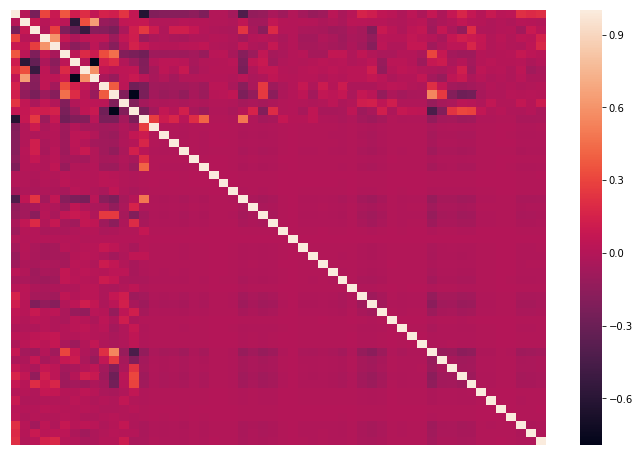

In [168]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(X.corr(), xticklabels=False, yticklabels=False)

We can focus on the first columns that exculdes the One Hot Encoder.

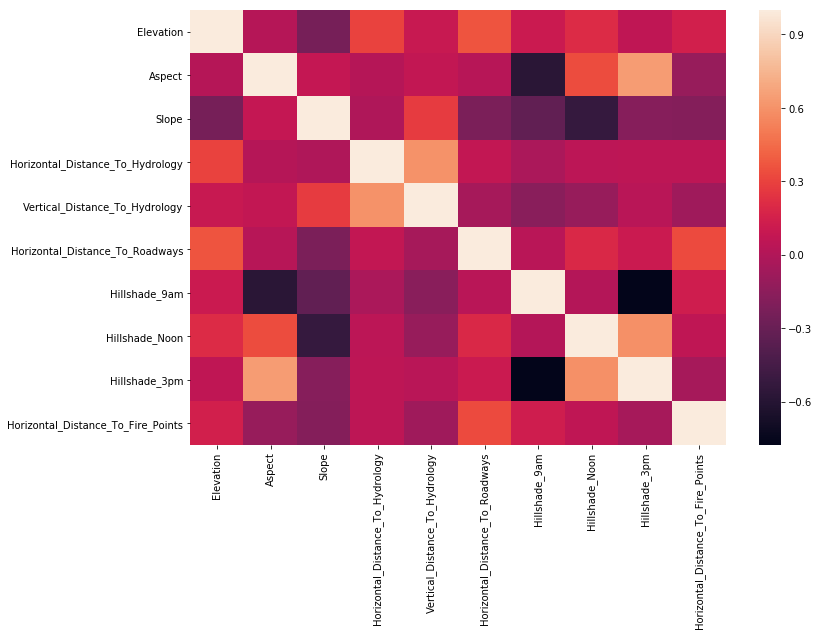

In [169]:
fig, ax = plt.subplots(figsize=(12,8))
Z = X.iloc[:,0:10]
ax = sns.heatmap(Z.corr())
#We notice that the most correlated datas are the ones in the first part of the dataset, so we do expect to drop the variables that are not in this region.

Controlling for the most significantly correlated pairs of variables seems quite interesting in this case :

In [170]:
#Highly correlated values
corr_list = []
threshold = 0.3
size = 10

for i in range(0, size):
    for j in range(i+1, size):
        if (Z.corr().iloc[i,j]>= threshold and Z.corr().iloc[i,j]<1) or (Z.corr().iloc[i,j] > -1 and Z.corr().iloc[i,j]<=-threshold):
            corr_list.append([Z.corr().iloc[i,j],i,j])

In [171]:
#Print the highest values
for v,i,j in sorted(corr_list,key= lambda x: -abs(x[0])):
    print("%s and %s = %.2f" % (train_data.columns[i], train_data.columns[j], v))

Hillshade_9am and Hillshade_3pm = -0.78
Aspect and Hillshade_3pm = 0.64
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.60
Hillshade_Noon and Hillshade_3pm = 0.59
Aspect and Hillshade_9am = -0.58
Slope and Hillshade_Noon = -0.52
Elevation and Horizontal_Distance_To_Roadways = 0.36
Aspect and Hillshade_Noon = 0.34
Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points = 0.33
Slope and Hillshade_9am = -0.33
Elevation and Horizontal_Distance_To_Hydrology = 0.30


Quite logically, the Hillshade at different times are correlated, as well as the horizontal and vertical distance to hydrology for example. To avoid including those pairs, we focus on the correlation between the feature and the Cover Type column :

In [172]:
#Highly correlated values with the answer
corr_y_list = {}
import operator

for col in train_data.columns :
    corr_y_list[col] = (train_data[col].corr(train_data['Cover_Type']))
corr_y_list.pop('Cover_Type', None)
#print(corr_y_list)
print(dict(sorted(corr_y_list.items(), key=operator.itemgetter(1), reverse=True)[:20]))

{'Wilderness_Area4': 0.32097383602343232, 'Soil_Type10': 0.24173506193607727, 'Soil_Type38': 0.16138695708639966, 'Soil_Type39': 0.15995942817677361, 'Slope': 0.14747694389431859, 'Soil_Type40': 0.12992919580866519, 'Soil_Type2': 0.11869652682697439, 'Soil_Type6': 0.11232660401538323, 'Soil_Type4': 0.098141028174269423, 'Soil_Type17': 0.092139166400277611, 'Soil_Type1': 0.090206402095478769, 'Soil_Type35': 0.081120969613263261, 'Vertical_Distance_To_Hydrology': 0.080418226191880285, 'Soil_Type5': 0.078325521339947704, 'Soil_Type37': 0.076884607648552844, 'Soil_Type3': 0.067794664422114279, 'Soil_Type14': 0.066794454808003695, 'Wilderness_Area3': 0.06632417597153413, 'Soil_Type11': 0.034973845444583082, 'Soil_Type13': 0.024302719059705588}


If we plot the correlation between each feature and the Cover type, we obtain the following :

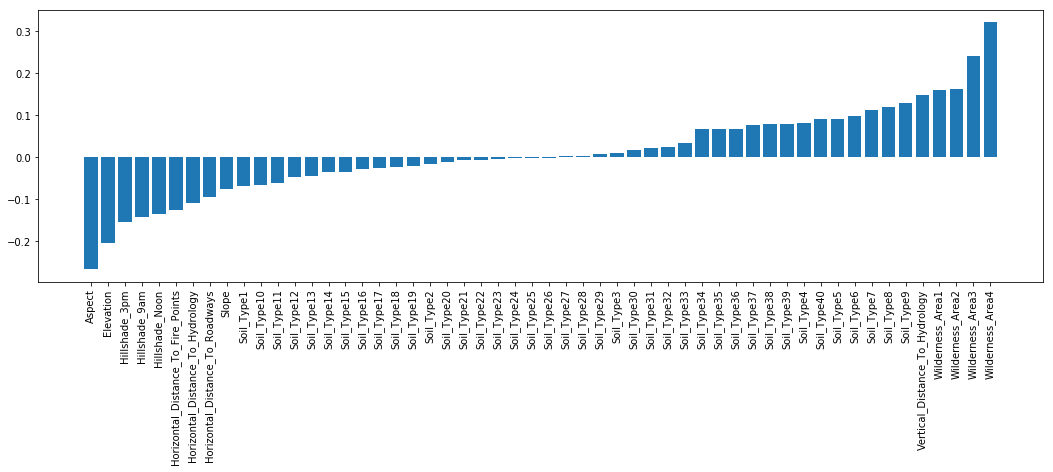

In [173]:
names = list(sorted(corr_y_list.keys()))
values = list(sorted(corr_y_list.values()))

#tick_label does the some work as plt.xticks()
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
plt.bar(range(len(corr_y_list)),values,tick_label=names)
plt.show()

And if we plot the correlation between the most significant pairs of features :

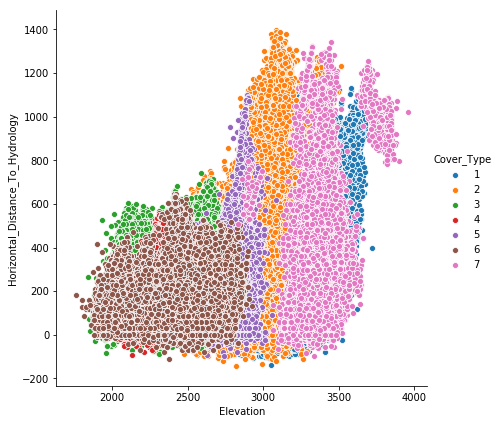

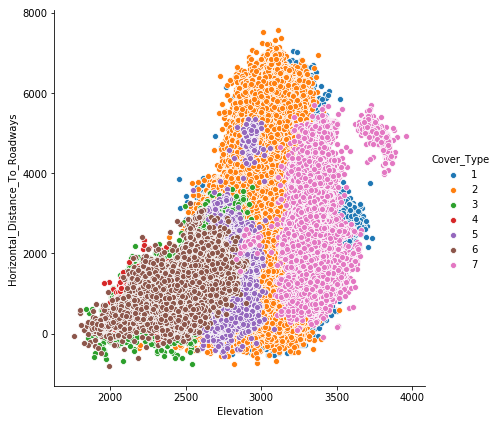

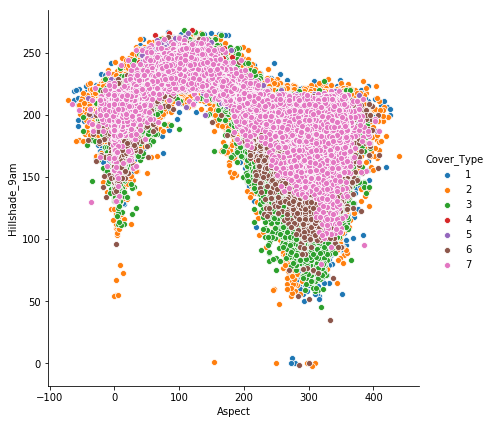

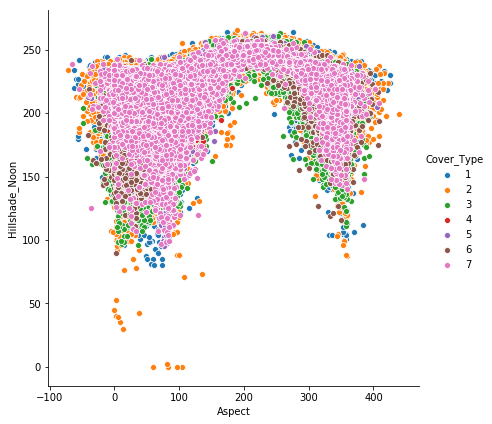

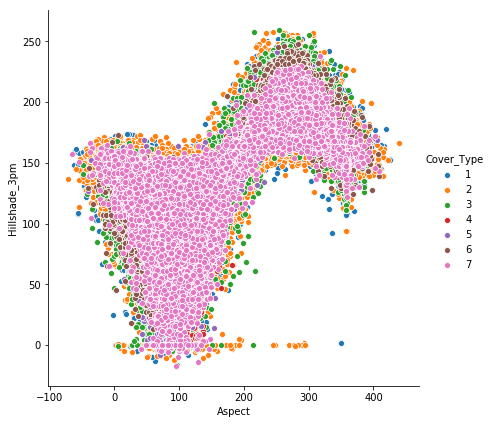

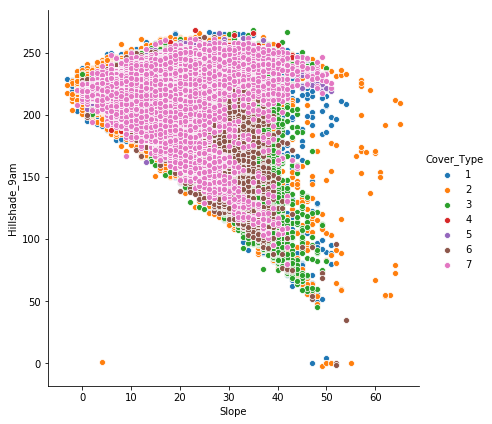

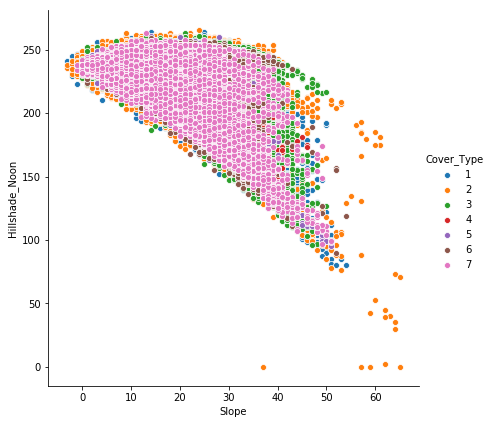

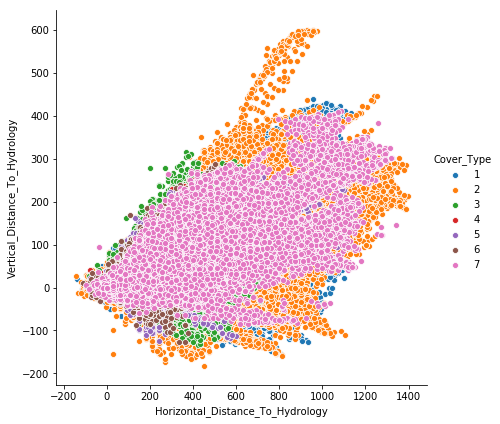

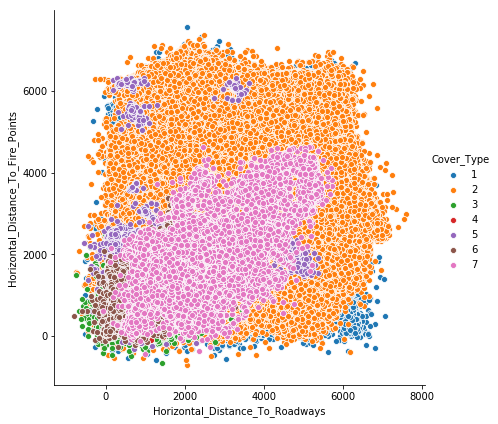

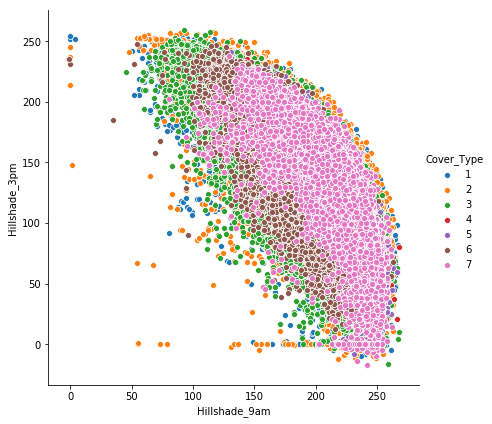

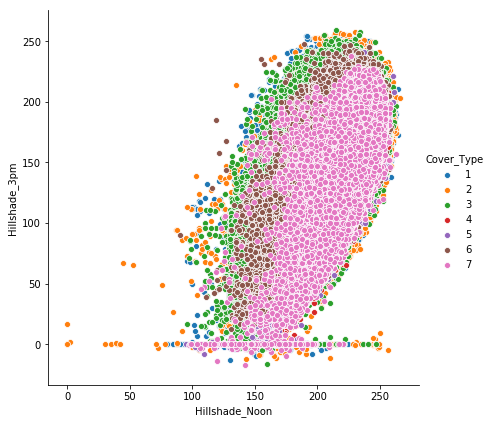

In [174]:
#Print correlations and column names
for v,i,j in corr_list:
    sns.pairplot(train_data, hue="Cover_Type", size=6, x_vars=train_data.columns[i],y_vars=train_data.columns[j] )
    plt.show()

We do notice pretty much variables aligned at 0, in Hillshade 3PM. This means there are zeros we should take care of in the Hillshade 3PM. We can take a look at the correlation between 9AM and Noon where the 3AM is null.

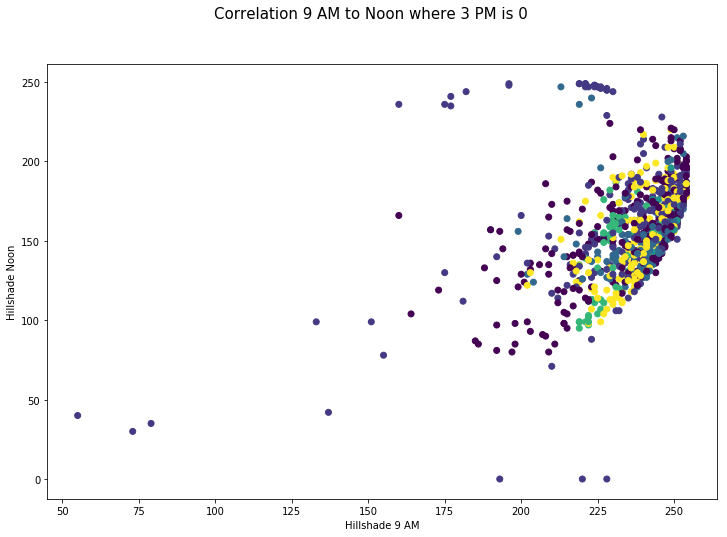

In [175]:
PM_0 = train_data[train_data.Hillshade_3pm==0] 

plt.figure(figsize=(12,8)) 
plt.scatter(PM_0.Hillshade_9am,PM_0.Hillshade_Noon, c=PM_0.Cover_Type) 
plt.suptitle('Correlation 9 AM to Noon where 3 PM is 0', fontsize=15) 
plt.xlabel('Hillshade 9 AM') 
plt.ylabel('Hillshade Noon') 

plt.show() 

There seems to be a negative correlation between Hillshade 9am and noon when 3pm is 0. We will make a regression to predict the 3pm missing values.

In [176]:
from sklearn.model_selection import train_test_split

data=train_data.copy() 
cols=data.columns.tolist() 
cols=cols[:8]+cols[9:]+[cols[8]] 
data=data[cols]

X_1,y_1,X_missing,y_missing= data[data.Hillshade_3pm!=0].values[:,:-1], \
data[data.Hillshade_3pm!=0].values[:,-1:].ravel(), \
data[data.Hillshade_3pm==0].values[:,:-1], \
data[data.Hillshade_3pm==0].values[:,-1:].ravel()

X_train,X_test,y_train,y_test=train_test_split(X_1,y_1)

In [177]:
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
#Fit a Gradient Boosted Regression Tree model to this dataset
gbrt=GradientBoostingRegressor(n_estimators=1000)
gbrt.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [178]:
train_data.Hillshade_3pm.loc[train_data.Hillshade_3pm==0].count()

1004

In [179]:
train_data.Hillshade_3pm.loc[train_data.Hillshade_3pm==0]=gbrt.predict(X_missing) 
train_data.Hillshade_3pm=train_data.Hillshade_3pm 

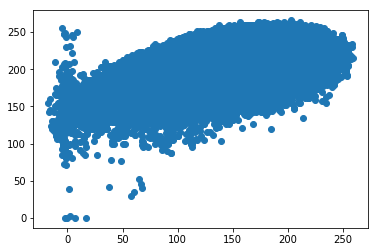

In [180]:
plt.scatter(train_data.Hillshade_3pm, train_data.Hillshade_Noon)

There seems to be no more issue.

### How are datas distributed ?

##### a. Cover_Types

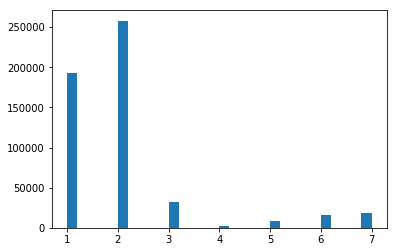

In [181]:
plt.hist(train_data['Cover_Type'], bins=30)
plt.show()

##### b. Elevation

Skewness: -0.813043
Kurtosis: 0.744733


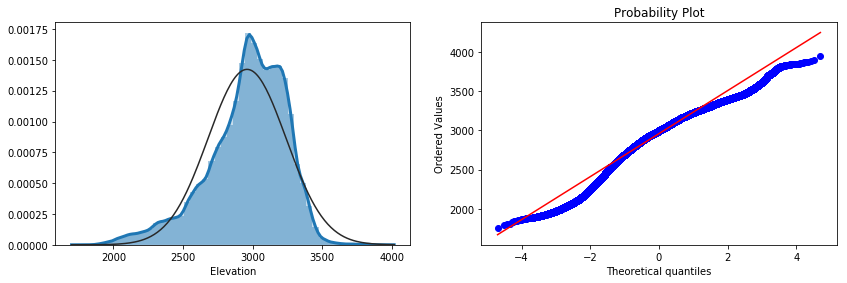

In [182]:
#Elevation
from scipy.stats import norm
import scipy.stats as stats

toplot = X['Elevation']

fig = plt.figure(figsize=(14,9))

ax1 = plt.subplot(221)
sns.distplot(toplot, hist = True, fit = norm, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

ax2 = plt.subplot(222)
stats.probplot(toplot, plot=plt)
#Check Skewness and Kurtosis
print("Skewness: %f" % toplot.skew())
print("Kurtosis: %f" % toplot.kurt())

##### c. Aspect

Skewness: 0.400137
Kurtosis: -1.209061


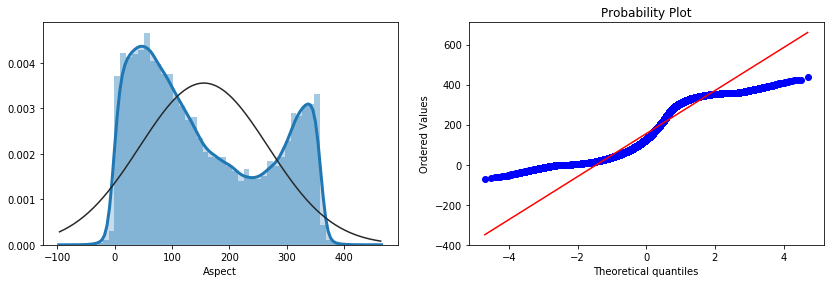

In [183]:
#Aspect
toplot = X['Aspect']

fig = plt.figure(figsize=(14,9))

ax1 = plt.subplot(221)
sns.distplot(toplot, hist = True, fit = norm, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

ax2 = plt.subplot(222)
stats.probplot(toplot, plot=plt)
#Check Skewness and Kurtosis
print("Skewness: %f" % toplot.skew())
print("Kurtosis: %f" % toplot.kurt())

We notice that the Aspect takes on negatives values and values greater than 360. However, the azimut is supposed to go from 0 to 360°. We can expect that in fact, negative values are measure errors that should restart from 360, and measures after 360 should restart from 0.

In [184]:
train_data.Aspect.loc[train_data.Aspect<0] = 360 + train_data.Aspect
train_data.Aspect.loc[train_data.Aspect>360] = train_data.Aspect - 360

In [185]:
test_data.Aspect.loc[test_data.Aspect<0] = 360 + test_data.Aspect
test_data.Aspect.loc[test_data.Aspect>360] = test_data.Aspect - 360

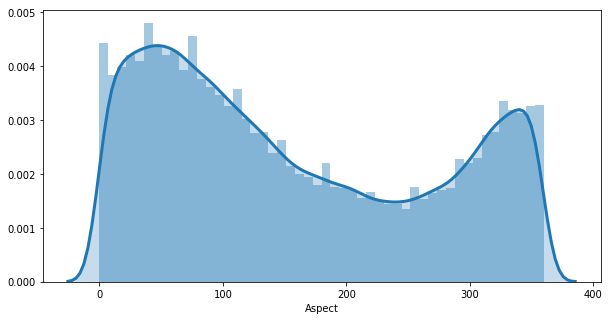

In [186]:
#Aspect
toplot = train_data['Aspect']

fig = plt.figure(figsize=(10,5))

sns.distplot(toplot, hist = True,kde = True, kde_kws = {'shade': True, 'linewidth': 3})

##### d. Slope

Skewness: 0.782664
Kurtosis: 0.580412


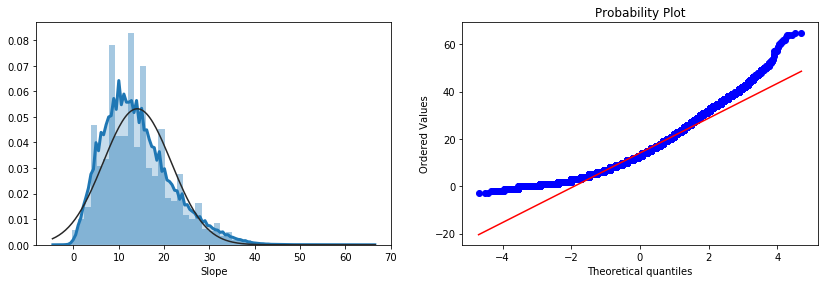

In [187]:
#Slope
toplot = X['Slope']

fig = plt.figure(figsize=(14,9))

ax1 = plt.subplot(221)
sns.distplot(toplot, hist = True, fit = norm, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

ax2 = plt.subplot(222)
stats.probplot(toplot, plot=plt)
#Check Skewness and Kurtosis
print("Skewness: %f" % toplot.skew())
print("Kurtosis: %f" % toplot.kurt())

##### e. Horizontal Distance To Hydrology

Skewness: 1.132040
Kurtosis: 1.360276


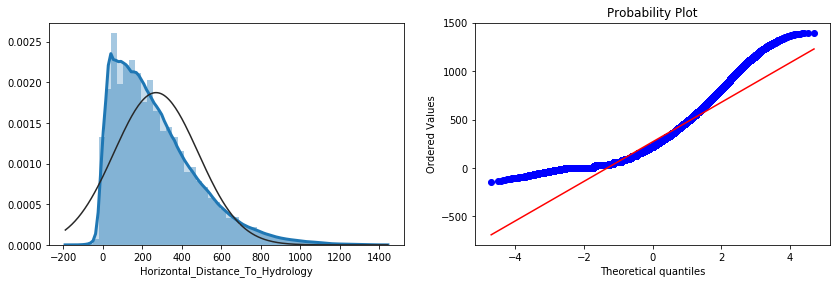

In [188]:
#Horizontal_Distance_To_Hydrology
toplot = X['Horizontal_Distance_To_Hydrology']

fig = plt.figure(figsize=(14,9))

ax1 = plt.subplot(221)
sns.distplot(toplot, hist = True, fit = norm, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

ax2 = plt.subplot(222)
stats.probplot(toplot, plot=plt)
#Check Skewness and Kurtosis
print("Skewness: %f" % toplot.skew())
print("Kurtosis: %f" % toplot.kurt())

##### f. Vertical Distance To Hydrology

Skewness: 1.776392
Kurtosis: 5.182293


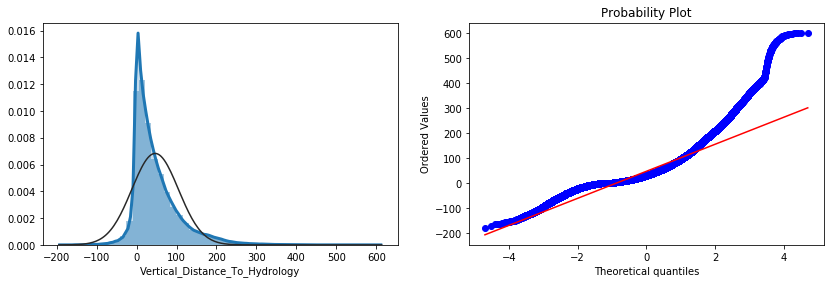

In [189]:
#Vertical_Distance_To_Hydrology
toplot = X['Vertical_Distance_To_Hydrology']

fig = plt.figure(figsize=(14,9))

ax1 = plt.subplot(221)
sns.distplot(toplot, hist = True, fit = norm, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

ax2 = plt.subplot(222)
stats.probplot(toplot, plot=plt)
#Check Skewness and Kurtosis
print("Skewness: %f" % toplot.skew())
print("Kurtosis: %f" % toplot.kurt())

##### g. Horizontal Distance to Roadways

Skewness: 0.707285
Kurtosis: -0.386870


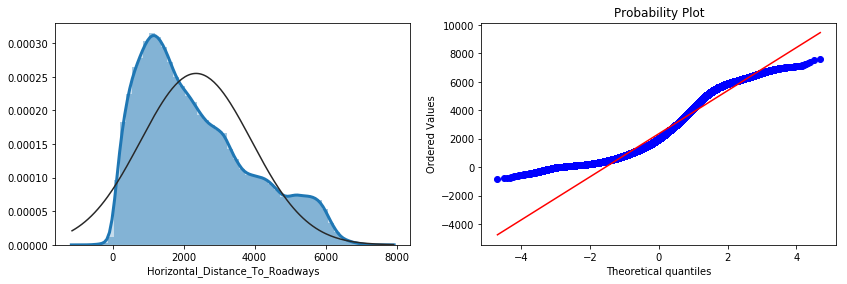

In [190]:
#Horizontal_Distance_To_Roadways
toplot = X['Horizontal_Distance_To_Roadways']

fig = plt.figure(figsize=(14,9))

ax1 = plt.subplot(221)
sns.distplot(toplot, hist = True, fit = norm, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

ax2 = plt.subplot(222)
stats.probplot(toplot, plot=plt)
#Check Skewness and Kurtosis
print("Skewness: %f" % toplot.skew())
print("Kurtosis: %f" % toplot.kurt())

##### h. Horizontal Distance To FirePoints

Skewness: 1.281252
Kurtosis: 1.632578


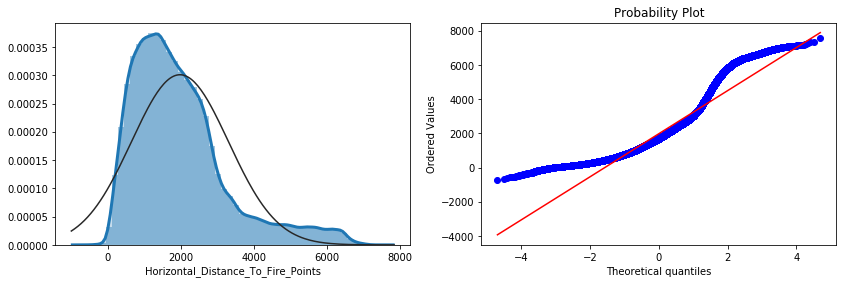

In [191]:
#Horizontal_Distance_To_Roadways
toplot = X['Horizontal_Distance_To_Fire_Points']

fig = plt.figure(figsize=(14,9))

ax1 = plt.subplot(221)
sns.distplot(toplot, hist = True, fit = norm, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

ax2 = plt.subplot(222)
stats.probplot(toplot, plot=plt)
#Check Skewness and Kurtosis
print("Skewness: %f" % toplot.skew())
print("Kurtosis: %f" % toplot.kurt())

##### i. Hillshade 9AM

Skewness: -1.171582
Kurtosis: 1.845323


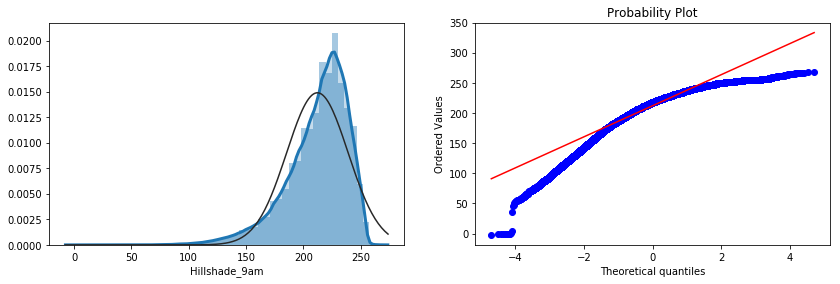

In [192]:
#Hillshade 9am
toplot = X['Hillshade_9am']

fig = plt.figure(figsize=(14,9))

ax1 = plt.subplot(221)
sns.distplot(toplot, hist = True, fit = norm, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

ax2 = plt.subplot(222)
stats.probplot(toplot, plot=plt)
#Check Skewness and Kurtosis
print("Skewness: %f" % toplot.skew())
print("Kurtosis: %f" % toplot.kurt())

##### j. Hillshade Noon

Skewness: -1.060335
Kurtosis: 2.081205


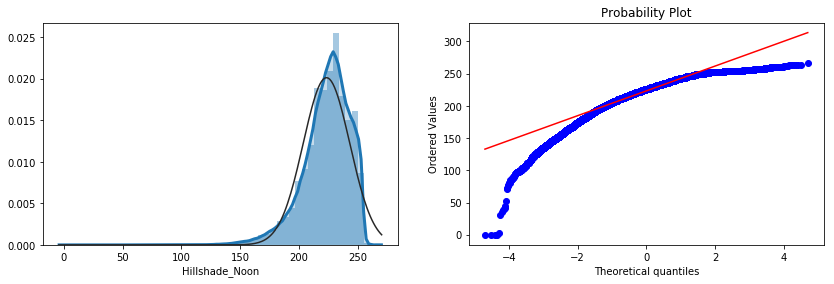

In [193]:
#Hillshade Noon
toplot = X['Hillshade_Noon']

fig = plt.figure(figsize=(14,9))

ax1 = plt.subplot(221)
sns.distplot(toplot, hist = True, fit = norm, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

ax2 = plt.subplot(222)
stats.probplot(toplot, plot=plt)
#Check Skewness and Kurtosis
print("Skewness: %f" % toplot.skew())
print("Kurtosis: %f" % toplot.kurt())

##### k. Hillshape 3PM

Skewness: -0.277797
Kurtosis: 0.399490


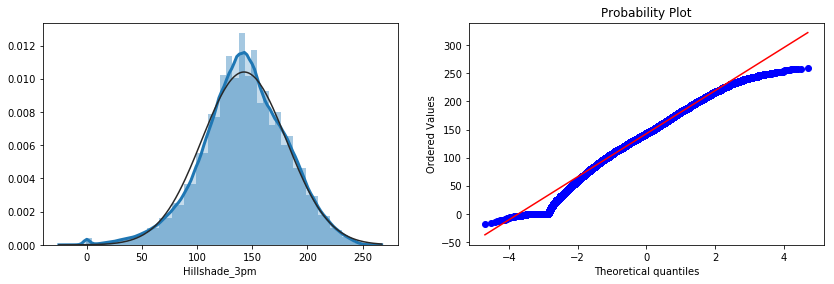

In [194]:
#Hillshade_3pm
toplot = X['Hillshade_3pm']

fig = plt.figure(figsize=(14,9))

ax1 = plt.subplot(221)
sns.distplot(toplot, hist = True, fit = norm, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

ax2 = plt.subplot(222)
stats.probplot(toplot, plot=plt)
#Check Skewness and Kurtosis
print("Skewness: %f" % toplot.skew())
print("Kurtosis: %f" % toplot.kurt())

##### l. Horizontal Distance To Fire Points

Skewness: 1.281252
Kurtosis: 1.632578


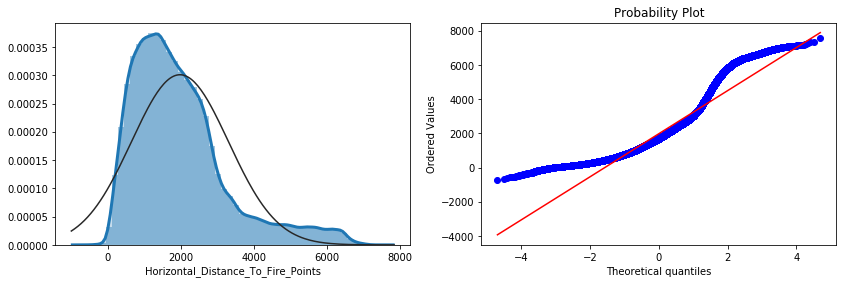

In [195]:
#Horizontal_Distance_To_Fire_Points 
toplot = X['Horizontal_Distance_To_Fire_Points']

fig = plt.figure(figsize=(14,9))

ax1 = plt.subplot(221)
sns.distplot(toplot, hist = True, fit = norm, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

ax2 = plt.subplot(222)
stats.probplot(toplot, plot=plt)
#Check Skewness and Kurtosis
print("Skewness: %f" % toplot.skew())
print("Kurtosis: %f" % toplot.kurt())

For the One-Hot-Encoder, it might be more interesting to take a look at the number of 1 for each soil type. A Soil Type with a really small number of forests classified inside might lead to additional noise and could be dropped.

In [196]:
for i in range(10, train_data.shape[1]-1):
    j = train_data.columns[i]
    print (train_data[j].value_counts())

0    291433
1    237287
Name: Wilderness_Area1, dtype: int64
0    501464
1     27256
Name: Wilderness_Area2, dtype: int64
0    298063
1    230657
Name: Wilderness_Area3, dtype: int64
0    495200
1     33520
Name: Wilderness_Area4, dtype: int64
0    525982
1      2738
Name: Soil_Type1, dtype: int64
0    521855
1      6865
Name: Soil_Type2, dtype: int64
0    524330
1      4390
Name: Soil_Type3, dtype: int64
0    517484
1     11236
Name: Soil_Type4, dtype: int64
0    527248
1      1472
Name: Soil_Type5, dtype: int64
0    522725
1      5995
Name: Soil_Type6, dtype: int64
0    528618
1       102
Name: Soil_Type7, dtype: int64
0    528553
1       167
Name: Soil_Type8, dtype: int64
0    527633
1      1087
Name: Soil_Type9, dtype: int64
0    499150
1     29570
Name: Soil_Type10, dtype: int64
0    517413
1     11307
Name: Soil_Type11, dtype: int64
0    501470
1     27250
Name: Soil_Type12, dtype: int64
0    512833
1     15887
Name: Soil_Type13, dtype: int64
0    528170
1       550
Name: Soil_Ty

The Soil Type 14 has only 1 forest classified in it.

### Feature Importance

Text(0.5, 1.0, 'Feature importance')

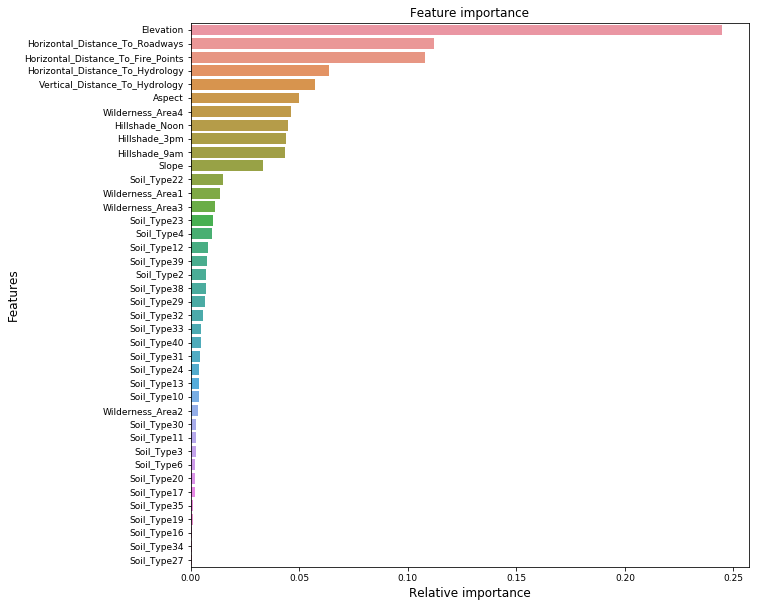

In [197]:
from sklearn.ensemble import RandomForestClassifier

plt.figure(figsize=(10,10))

name = "Random Forest"

rf = RandomForestClassifier()
rf.fit(X,y)
classifier = rf

indices = np.argsort(rf.feature_importances_)[::-1][:40]
g = sns.barplot(y=X.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)

g.tick_params(labelsize=9)
g.set_title("Feature importance")

As we can notice, the column that has the most importance seems to be the Elevation. This seems that we should take a closer look at the distribution between the elevation and other columns, and focus our feature engineering on those columns.

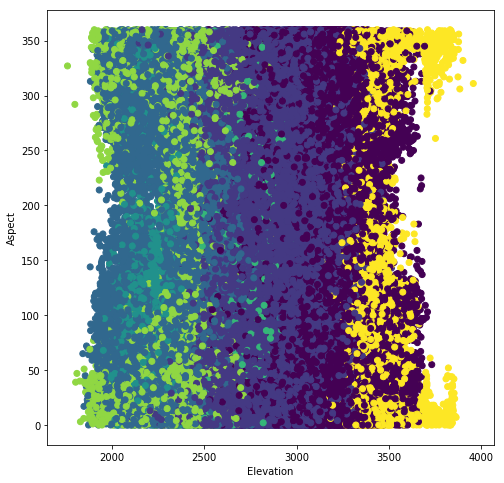

In [198]:
#Elevation vs Aspect
plt.figure(figsize=(8,8))
plt.scatter(train_data.Elevation, train_data.Aspect, c=train_data.Cover_Type)
plt.xlabel("Elevation")
plt.ylabel("Aspect")
plt.show()

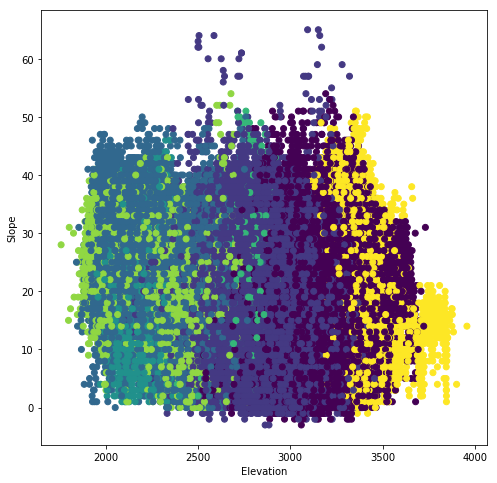

In [199]:
#Elevation vs Slope
plt.figure(figsize=(8,8))
plt.scatter(train_data.Elevation, train_data.Slope, c=train_data.Cover_Type)
plt.xlabel("Elevation")
plt.ylabel("Slope")
plt.show()

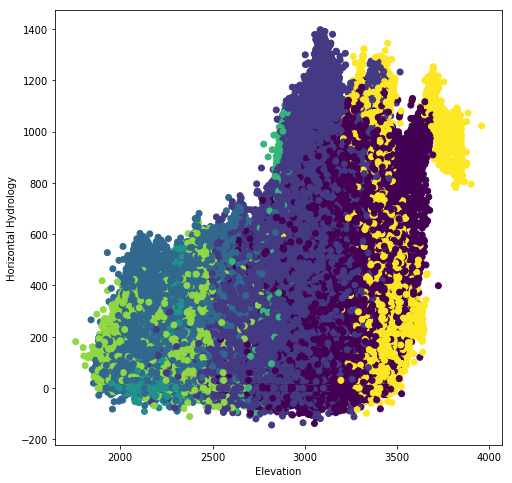

In [200]:
#Elevation vs Horizontal Distance Hydrology
plt.figure(figsize=(8,8))
plt.scatter(train_data.Elevation, train_data.Horizontal_Distance_To_Hydrology, c=train_data.Cover_Type)
plt.xlabel("Elevation")
plt.ylabel("Horizontal Hydrology")
plt.show()

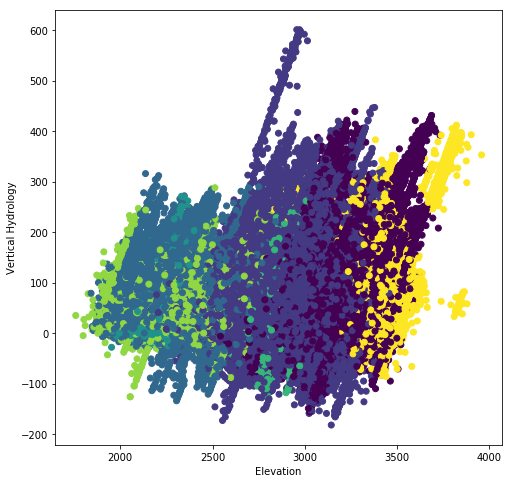

In [201]:
#Elevation vs Vertical Distance Hydrology
plt.figure(figsize=(8,8))
plt.scatter(train_data.Elevation, train_data.Vertical_Distance_To_Hydrology, c=train_data.Cover_Type)
plt.xlabel("Elevation")
plt.ylabel("Vertical Hydrology")
plt.show()

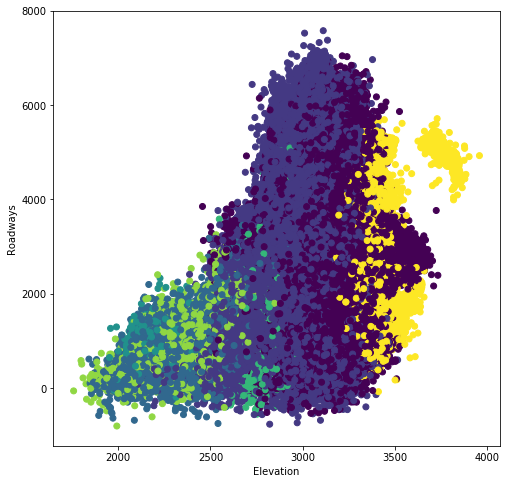

In [202]:
#Elevation vs Horizontal Distance Roadways
plt.figure(figsize=(8,8))
plt.scatter(train_data.Elevation, train_data.Horizontal_Distance_To_Roadways, c=train_data.Cover_Type)
plt.xlabel("Elevation")
plt.ylabel("Roadways")
plt.show()

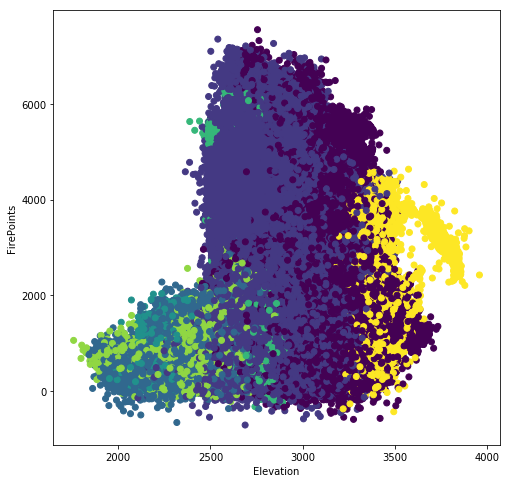

In [203]:
#Elevation vs Horizontal Distance Fire Points
plt.figure(figsize=(8,8))
plt.scatter(train_data.Elevation, train_data.Horizontal_Distance_To_Fire_Points, c=train_data.Cover_Type)
plt.xlabel("Elevation")
plt.ylabel("FirePoints")
plt.show()

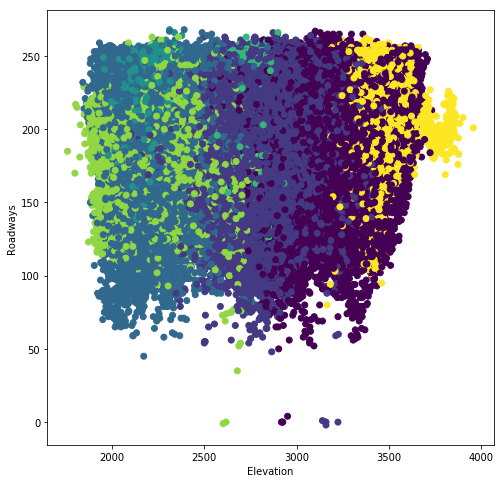

In [204]:
#Elevation vs HillShade 9am
plt.figure(figsize=(8,8))
plt.scatter(train_data.Elevation, train_data.Hillshade_9am, c=train_data.Cover_Type)
plt.xlabel("Elevation")
plt.ylabel("Roadways")
plt.show()

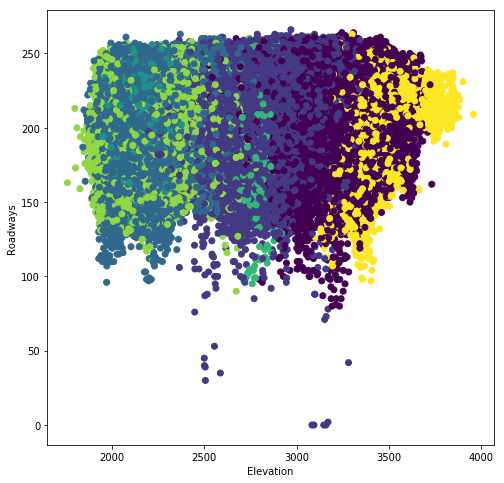

In [205]:
#Elevation vs HillShade Noon
plt.figure(figsize=(8,8))
plt.scatter(train_data.Elevation, train_data.Hillshade_Noon, c=train_data.Cover_Type)
plt.xlabel("Elevation")
plt.ylabel("Roadways")
plt.show()

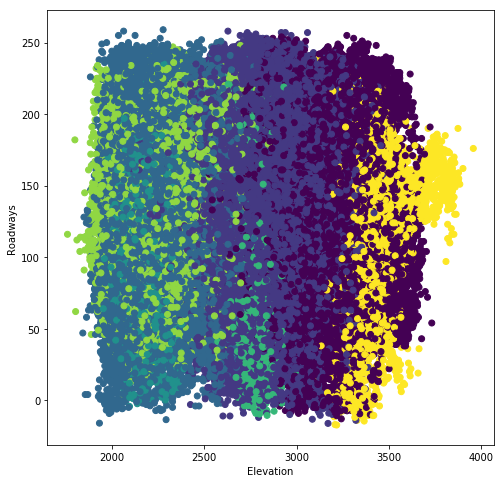

In [206]:
#Elevation vs HillShade 3pm
plt.figure(figsize=(8,8))
plt.scatter(train_data.Elevation, train_data.Hillshade_3pm, c=train_data.Cover_Type)
plt.xlabel("Elevation")
plt.ylabel("Roadways")
plt.show()

Most of the relations seem linear which allows the developement of tree based measures. But it might be useful to adjust the relations for :
- Horizontal Distance To Hydrology
- Vertical Distance To Hydrology
- Horizontal Distance to Roadways
    
This step will be done in the Feature Engineering section.

### Feature Engineering

I have created linear combinations of several columns and iterated to identify potentially interesting combinations. I have also tried to normalize the columns, but it did not bring much to the models tested (even though it is a requirement sometimes).

#### Linear Combinations between columns

Add the columns discussed in the Approch section, we can compute the slope on the hydrology columns, and compute the mean distance to hydrology, fire points and roadways as a measure of interest.

In [207]:
train_data['slope_hydrology'] = np.sqrt((train_data['Vertical_Distance_To_Hydrology']*train_data['Vertical_Distance_To_Hydrology']) + (train_data['Horizontal_Distance_To_Hydrology']*train_data['Horizontal_Distance_To_Hydrology']))
train_data['mean_distance'] = (train_data['Horizontal_Distance_To_Hydrology'] + train_data['Horizontal_Distance_To_Fire_Points'] + train_data['Horizontal_Distance_To_Roadways'])/3

In [208]:
test_data['slope_hydrology'] = np.sqrt((test_data['Vertical_Distance_To_Hydrology']*test_data['Vertical_Distance_To_Hydrology']) + (test_data['Horizontal_Distance_To_Hydrology']*test_data['Horizontal_Distance_To_Hydrology']))
test_data['mean_distance'] = (test_data['Horizontal_Distance_To_Hydrology'] + test_data['Horizontal_Distance_To_Fire_Points'] + test_data['Horizontal_Distance_To_Roadways'])/3

I am also creating columns for combinations of the distances.

In [209]:
train_data['mean_1'] = (train_data['Horizontal_Distance_To_Hydrology'] + train_data['Horizontal_Distance_To_Fire_Points'])/2
train_data['mean_2'] = (train_data['Horizontal_Distance_To_Hydrology'] + train_data['Horizontal_Distance_To_Roadways'])/2
train_data['mean_3'] = (train_data['Horizontal_Distance_To_Roadways'] + train_data['Horizontal_Distance_To_Fire_Points'])/2

In [210]:
test_data['mean_1'] = (test_data['Horizontal_Distance_To_Hydrology'] + test_data['Horizontal_Distance_To_Fire_Points'])/2
test_data['mean_2'] = (test_data['Horizontal_Distance_To_Hydrology'] + test_data['Horizontal_Distance_To_Roadways'])/2
test_data['mean_3'] = (test_data['Horizontal_Distance_To_Roadways'] + test_data['Horizontal_Distance_To_Fire_Points'])/2

Finally, I have decided to create an average HillShade column :

In [211]:
train_data['avg_hillshade'] = (train_data['Hillshade_3pm'] + train_data['Hillshade_Noon'] + train_data['Hillshade_9am'])/3
test_data['avg_hillshade'] = (test_data['Hillshade_3pm'] + test_data['Hillshade_Noon'] + test_data['Hillshade_9am'])/3

#### Linearity adjustment for Elevation

For the Horizontal Distance To Hydrology :

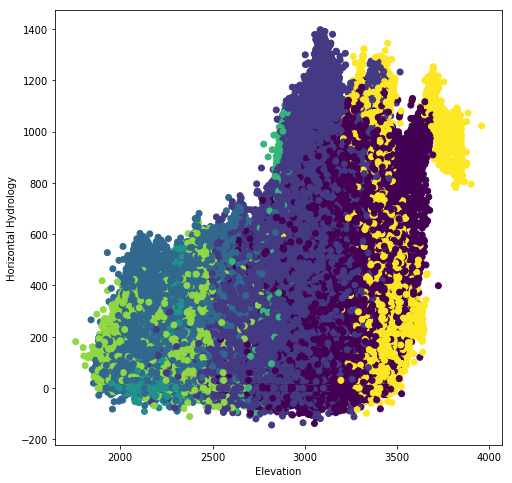

In [212]:
#Elevation vs Horizontal Distance Hydrology
plt.figure(figsize=(8,8))
plt.scatter(train_data.Elevation, train_data.Horizontal_Distance_To_Hydrology, c=train_data.Cover_Type)
plt.xlabel("Elevation")
plt.ylabel("Horizontal Hydrology")
plt.show()

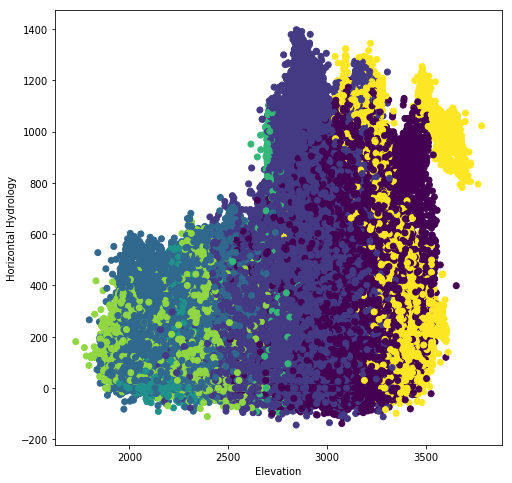

In [213]:
#Adjustement
plt.figure(figsize=(8,8))
plt.scatter(train_data.Elevation-0.17*train_data.Horizontal_Distance_To_Hydrology, train_data.Horizontal_Distance_To_Hydrology, c=train_data.Cover_Type)
plt.xlabel("Elevation")
plt.ylabel("Horizontal Hydrology")
plt.show()

For the Vertical Distance To Hydrology :

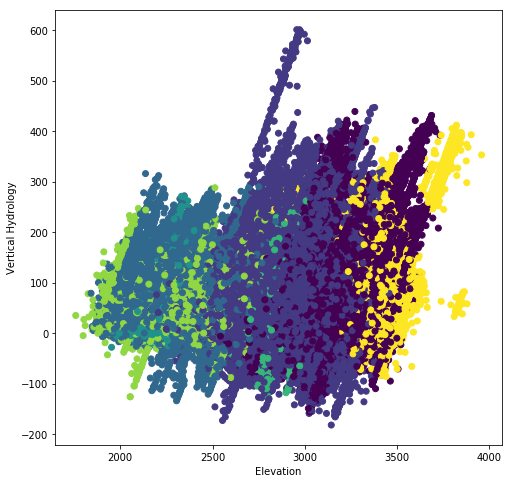

In [214]:
#Elevation vs Vertical Distance Hydrology
plt.figure(figsize=(8,8))
plt.scatter(train_data.Elevation, train_data.Vertical_Distance_To_Hydrology, c=train_data.Cover_Type)
plt.xlabel("Elevation")
plt.ylabel("Vertical Hydrology")
plt.show()

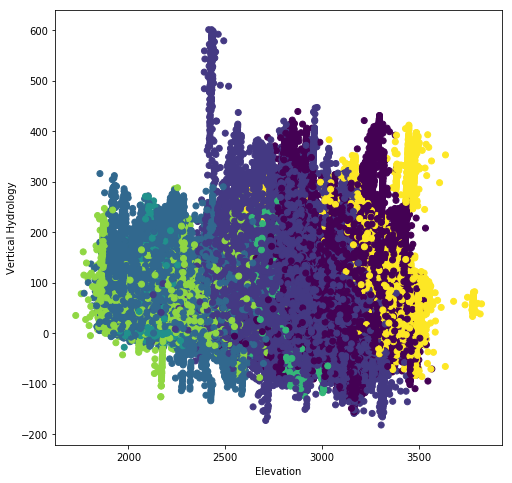

In [215]:
#Elevation vs Vertical Distance Hydrology
plt.figure(figsize=(8,8))
plt.scatter(train_data.Elevation-0.9*train_data.Vertical_Distance_To_Hydrology, train_data.Vertical_Distance_To_Hydrology, c=train_data.Cover_Type)
plt.xlabel("Elevation")
plt.ylabel("Vertical Hydrology")
plt.show()

For the Horizontal Distance To Roadways :

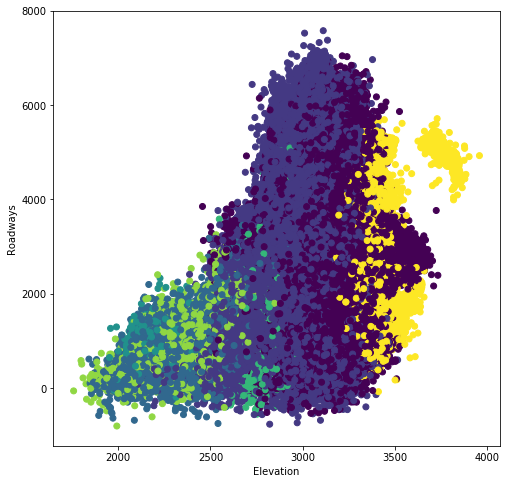

In [216]:
#Elevation vs Horizontal Distance Roadways
plt.figure(figsize=(8,8))
plt.scatter(train_data.Elevation, train_data.Horizontal_Distance_To_Roadways, c=train_data.Cover_Type)
plt.xlabel("Elevation")
plt.ylabel("Roadways")
plt.show()

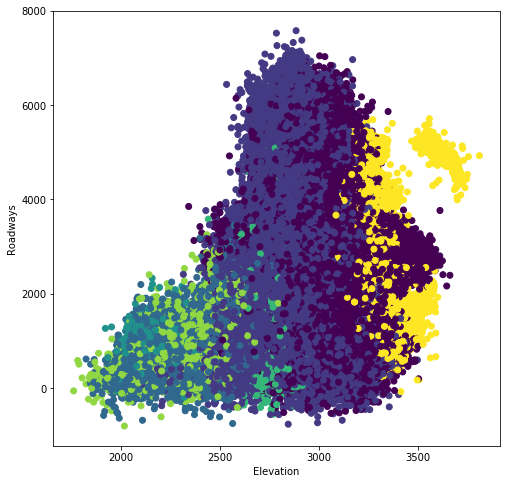

In [217]:
#Elevation vs Horizontal Distance Roadways
plt.figure(figsize=(8,8))
plt.scatter(train_data.Elevation-0.03*train_data.Horizontal_Distance_To_Roadways, train_data.Horizontal_Distance_To_Roadways, c=train_data.Cover_Type)
plt.xlabel("Elevation")
plt.ylabel("Roadways")
plt.show()

Now we have created this linearity, we just have to create the corresponding columns in the data frames.

In [218]:
train_data['Adjusted_HDH'] = train_data['Elevation'] - 0.17 * train_data['Horizontal_Distance_To_Hydrology']
test_data['Adjusted_HDH'] = test_data['Elevation'] - 0.17 * test_data['Horizontal_Distance_To_Hydrology']

train_data['Adjusted_VDH'] = train_data['Elevation'] - 0.9 * train_data['Vertical_Distance_To_Hydrology']
test_data['Adjusted_VDH'] = test_data['Elevation'] - 0.9 * test_data['Vertical_Distance_To_Hydrology']

train_data['Adjusted_HDR'] = train_data['Elevation'] - 0.03 * train_data['Horizontal_Distance_To_Roadways']
test_data['Adjusted_HDR'] = test_data['Elevation'] - 0.03 * test_data['Horizontal_Distance_To_Roadways']

#### Additional features

The aime of this section is to look at some possible transformations of datas.

Firstly, compute the cosine of the slope as it is quite an important feature :

In [219]:
train_data['Cos_slope'] = np.cos(train_data['Slope'])
test_data['Cos_slope'] = np.cos(test_data['Slope'])

Take a look at the Square and the log of the Elevation :

In [220]:
train_data['Sqr_Elev'] = train_data['Elevation']*train_data['Elevation']
test_data['Sqr_Elev'] = test_data['Elevation']*test_data['Elevation']

In [221]:
train_data['Log_Elev'] = np.log(train_data['Elevation'])
test_data['Log_Elev'] = np.log(test_data['Elevation'])

In [222]:
y = train_data['Cover_Type']
X = train_data.loc[:, train_data.columns != 'Cover_Type']

To avoid testing models on 550'000 lines, we build train and test samples of 10'000 observations.

In [224]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import confusion_matrix 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((370104, 66), (158616, 66), (370104,), (158616,))

In [225]:
X_train = X_train.sample(n=10000, random_state=1, replace=True)
y_train = y_train.sample(n=10000, random_state=1, replace=True)
X_test = X_test.sample(n=10000, random_state=1, replace=True)
y_test = y_test.sample(n=10000, random_state=1, replace=True)
df_sample = train_data.sample(n=10000, random_state=1, replace=True)

### Outlier detection

Other methods flag observations based on measures such as the interquartile range. For example, if Q1 and Q3 are the lower and upper quartiles respectively, then one could define an outlier to be any observation outside the range: 

[Q1-k(Q3-Q1),Q3+k(Q3-Q1)]

for some nonnegative constant k. John Tukey proposed this test, where k=1.5 indicates an "outlier", and k=3 indicates data that is "far out". As we did not notice any major outlier on the histograms above, we can expect our outlier detection program to return only few/no outlier.

In [226]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    from collections import Counter
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 3 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train_data,2,["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points" ])

In [227]:
print(Outliers_to_drop)

[7566, 17639, 17927, 43161, 49000, 72565, 81553, 179775, 200837, 203622, 203634, 207010, 211181, 234670, 250519, 294637, 301112, 313819, 319868, 332409, 341560, 383107, 383900, 385714, 408255, 422611, 437307, 445064, 459457, 461885, 466054, 466071, 505708, 524011]


In [228]:
train_data.loc[Outliers_to_drop]

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
Id                                                                   
7566         3111     357     51                               265   
17639        3224     310     55                               134   
17927        3072     354     51                               212   
43161        2964     332     48                               163   
49000        2555       3     60                               190   
72565        3007     353     50                               190   
81553        2679     333     54                               145   
179775       2946     354     51                               216   
200837       2491     348     46                               124   
203622       3044     336     51                               201   
203634       2909     329     47                               362   
207010       3068     354     51                               192   
211181       3140     320     46                               475   
234670       2503     359     53                               300   
250519       2599     315     49                               196   
294637       2498     347     46                               134   
301112       2623     350     47                               162   
313819       3012     353     49                               201   
319868       3023     348     46                               228   
332409       2945     345     50                               172   
341560       3017     353     48                               216   
383107       2516     358     52                               323   
383900       2501       3     63                               216   
385714       2944     353     52                               201   
408255       2587       8     64                               240   
422611       3117     321     46                               509   
437307       2506      13     64                               201   
445064       2673       2     52                               175   
459457       2500       0     62                               234   
461885       2876     351     47                               175   
466054       2523     343     52                               175   
466071       2506     344     46                               150   
505708       2613     337     49                               134   
524011       2505       5     62                               203   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
Id                                                                        
7566                                63                             2628   
17639                               70                             2982   
17927                               61                             2790   
43161                               -5                             3071   
49000                              135                              684   
72565                               -5                             2760   
81553                              140                             1745   
179775                              77                             2912   
200837                              66                              830   
203622                              53                             3178   
203634                             175                             2736   
207010                              51                             2790   
211181                             269                             1713   
234670                              92                              485   
250519                              64                             1439   
294637                              75                              800   
301112                              73                             1723   
313819                               5                        

In [229]:
#X = X.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
#y = y.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [230]:
train_data = train_data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

To further analyze our dataset, we can draw a Pairplot on the whole dataset excluding the One Hot Encoder and the Wilderness areas.

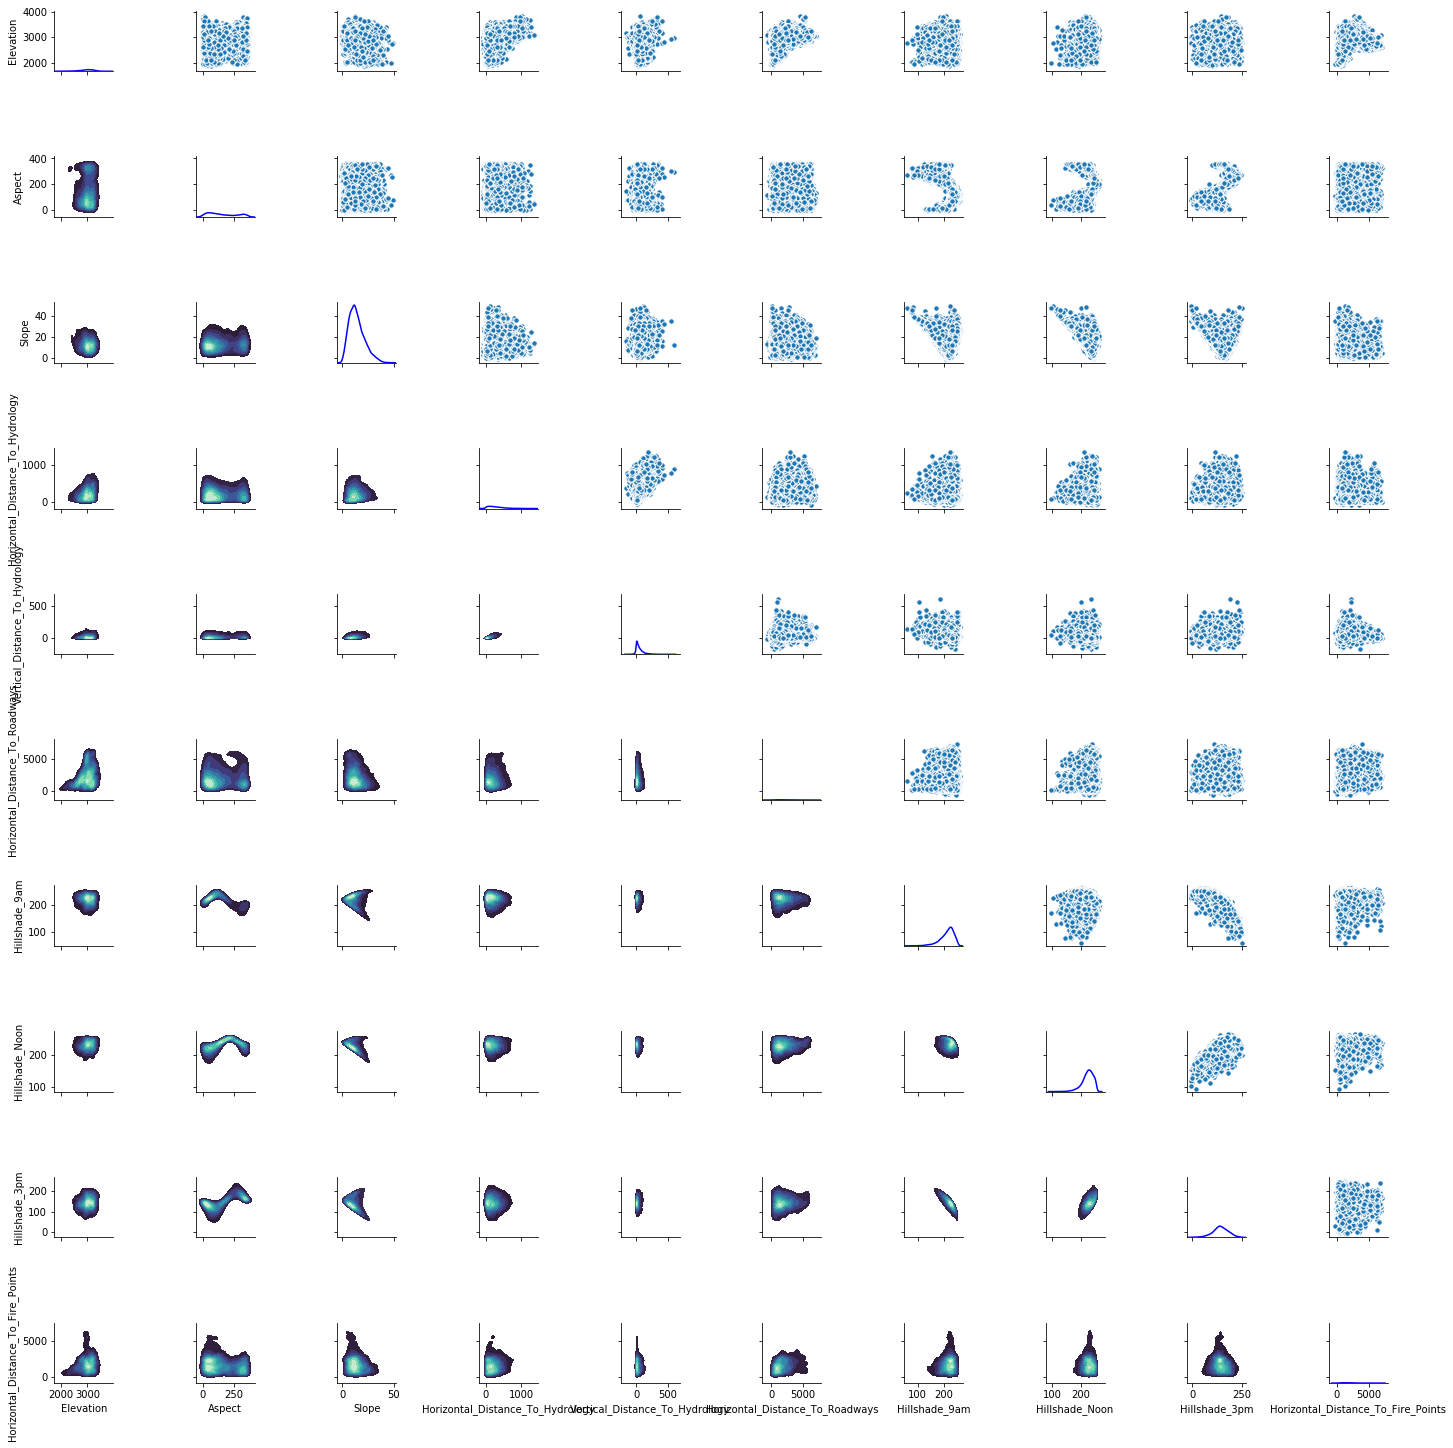

In [231]:
fig1 = sns.PairGrid(df_sample.iloc[:,0:10], height=2).map_diag(sns.kdeplot, color='Blue', legend=False).map_upper(plt.scatter, edgecolor="w", s=30).map_lower(sns.kdeplot, shade=True,shade_lowest=False, cmap="mako", legend=False)
display(fig1)
#sns.pairplot(train_data.iloc[:,0:10])

### PCA Dimension reduction

The main linear technique for dimensionality reduction, principal component analysis, performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized. In practice, the covariance (and sometimes the correlation) matrix of the data is constructed and the eigenvectors on this matrix are computed. The eigenvectors that correspond to the largest eigenvalues (the principal components) can now be used to reconstruct a large fraction of the variance of the original data. Moreover, the first few eigenvectors can often be interpreted in terms of the large-scale physical behavior of the system.

From : https://en.wikipedia.org/wiki/Dimensionality_reduction

In [232]:
rndperm = np.random.permutation(df_sample.shape[0])

In [233]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_sample.loc[:, df_sample.columns != 'Cover_Type'].values)

pca_cols = pd.DataFrame(df_sample)

pca_cols['pca-one'] = pca_result[:,0]
pca_cols['pca-two'] = pca_result[:,1] 
pca_cols['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [  9.99997351e-01   1.95738876e-06   6.42146483e-07]


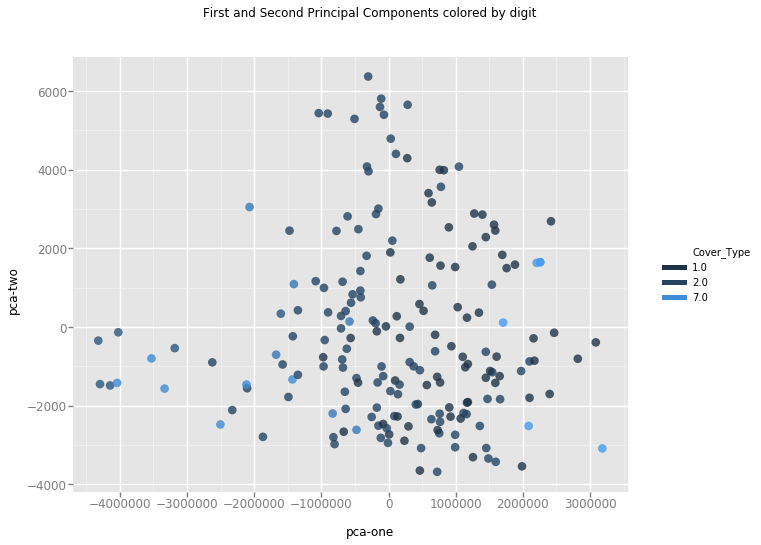

<ggplot: (-9223372029848627477)>

In [234]:
#In 2D
from pandas import Timestamp
from ggplot import *

chart = ggplot(pca_cols.loc[rndperm[:],:], aes(x='pca-one', y='pca-two', z='pca-three',color='Cover_Type') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

<Figure size 1440x1440 with 0 Axes>

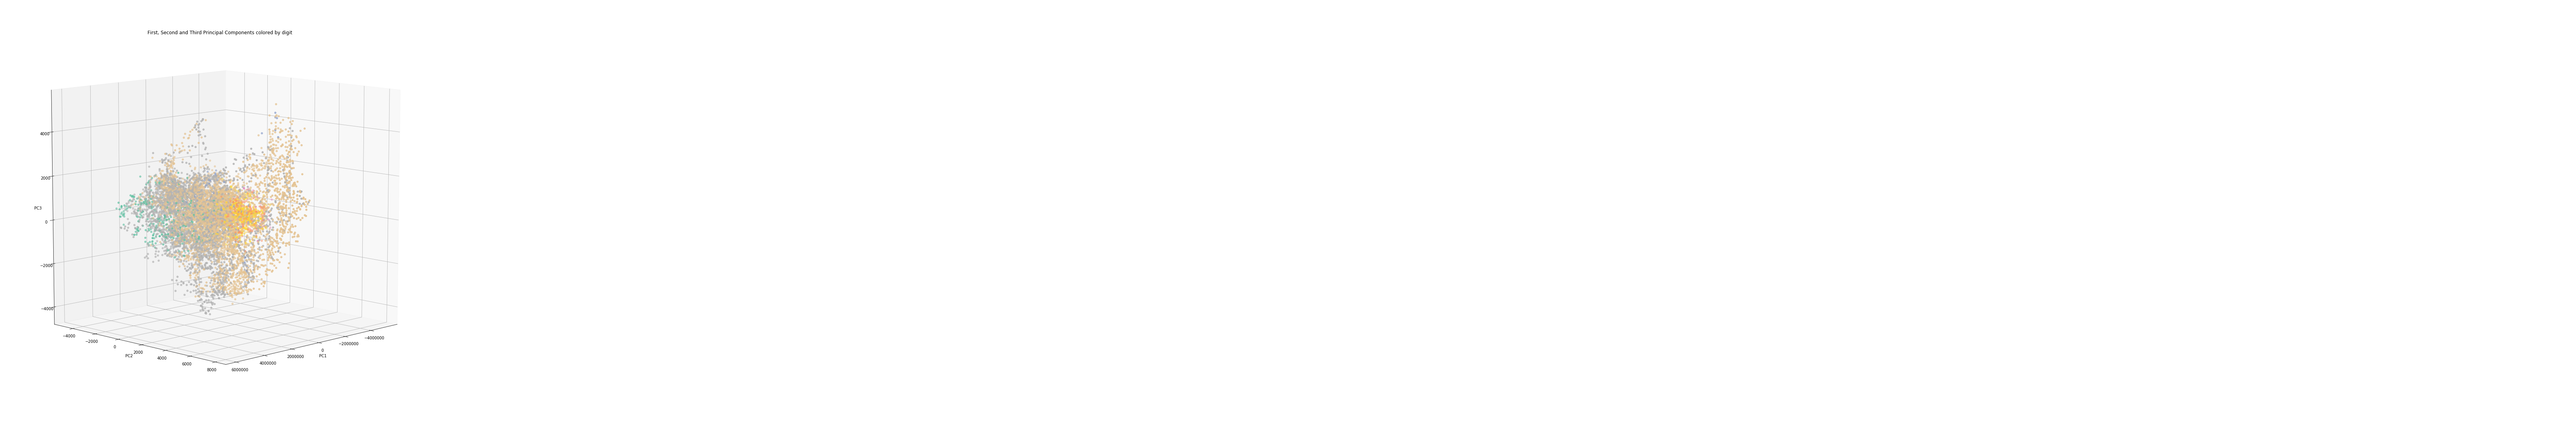

In [235]:
# Or in 3D :
from mpl_toolkits.mplot3d import axes3d, Axes3D
from mpl_toolkits.mplot3d import proj3d

plt.figure(figsize=(20,20))
fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')

ax.scatter(pca_cols['pca-one'], pca_cols['pca-two'], pca_cols['pca-three'], cmap="Set2_r", c = pca_cols['Cover_Type'])

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

ax.set_title("First, Second and Third Principal Components colored by digit")
ax.view_init(10, 45)
#ax.legend()
plt.show()

# Model selection on reduced sample

The idea is to select models that tend to work best on a small yet representative data sampleof 10'000 lines. This will allow us to do much quicker computations and eventually observe trends regarding which models work best.

This approach is naive. No parameters are set, we simply want to rank the magnitude of the model accuracy.

Finally, models are ordered.

In [236]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=2, random_state=23)

## Supervised approach

### Naïve Bayes Classifier

In machine learning, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naïve Bayes cannot handle negative values.

In [237]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df_sample)
scaled_df = pd.DataFrame(scaled_df, columns=df_sample.columns)

In [238]:
y_scaled = scaled_df['Cover_Type']
X_scaled = scaled_df.loc[:, scaled_df.columns != 'Cover_Type']

In [239]:
X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(X_scaled,y_scaled,test_size=0.01,random_state=42)

In [240]:
X_train_scaled_sample = X_train_scaled.sample(n=10000, random_state=1, replace=True)
y_train_scaled_sample = y_train_scaled.sample(n=10000, random_state=1, replace=True)
X_test_scaled_sample = X_test_scaled.sample(n=10000, random_state=1, replace=True)
y_test_scaled_sample = y_test_scaled.sample(n=10000, random_state=1, replace=True)
df_scaled_sample = scaled_df.sample(n=10000, random_state=1, replace=True)

Accuracy Model : 52.64% 


Text(0.5, 1.05, 'Confusion_matrix')

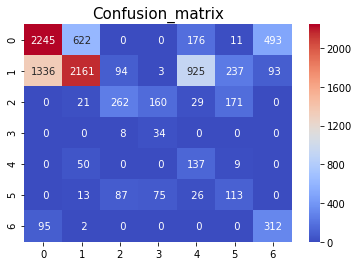

In [241]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
result_gnb = accuracy_score(y_test, y_pred_gnb)*100
print("Accuracy Model : %.2f%% " % result_gnb)

sns.heatmap(confusion_matrix(y_test,y_pred_gnb),annot=True,fmt='3.0f',cmap="coolwarm")
plt.title('Confusion_matrix', y=1.05, size=15)

In [242]:
#Cross-Validation
gnb_gs = GridSearchCV(gnb,param_grid = {}, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gnb_gs.fit(X_train,y_train)

# Best score
param_gnb_gs = gnb_gs.best_estimator_
result_gnb_gs = gnb_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_gnb_gs))

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Accuracy CV : 52.85% 


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished


### Logistic Regression

Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

Accuracy Model : 62.82% 


Text(0.5, 1.05, 'Confusion_matrix')

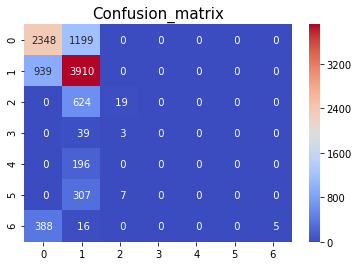

In [243]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
# Train the model using the training sets and check score
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
result_lr = accuracy_score(y_test, y_pred_lr)*100
print("Accuracy Model : %.2f%% " % result_lr)

sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot=True,fmt='3.0f',cmap="coolwarm")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
#Cross-Validation
lr_param_grid = {"tol": [0.01],
              "max_iter": [50, 150]}

lr_gs = GridSearchCV(lr,param_grid = lr_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
lr_gs.fit(X_train,y_train)

# Best score
param_lr_gs = lr_gs.best_estimator_
result_lr_gs = lr_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_lr_gs))

Fitting 2 folds for each of 2 candidates, totalling 4 fits


### Decision Tree Classifier

Decision tree learning uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves).

In [ ]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
result_dt = accuracy_score(y_test, y_pred_dt)*100
print("Accuracy Model : %.2f%% " % result_dt)

sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True,fmt='3.0f',cmap="coolwarm")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
#Cross-Validation
dt_param_grid = {"presort": [True, False]}

dt_gs = GridSearchCV(dt,param_grid = dt_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
dt_gs.fit(X_train,y_train)

# Best score
param_dt_gs = dt_gs.best_estimator_
result_dt_gs = dt_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_dt_gs))

### Random Forest

Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
result_rf = accuracy_score(y_test, y_pred_rf)*100
print("Accuracy Model : %.2f%% " % result_rf)

sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True,fmt='3.0f',cmap="coolwarm")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
#Cross-Validation
rf_param_grid = {}

rf_gs = GridSearchCV(rf,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

rf_gs.fit(X_train,y_train)

# Best score
param_rf_gs = rf_gs.best_estimator_
result_rf_gs = rf_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_rf_gs))

### Extra Trees classifier

The main difference between random forests and extra trees (usually called extreme random forests) lies in the fact that, instead of computing the locally optimal feature/split combination (for the random forest), for each feature under consideration, a random value is selected for the split (for the extra trees).

This leads to more diversified trees and less splitters to evaluate when training an extremly random forest.

In [ ]:
from sklearn import ensemble
from sklearn.ensemble import ExtraTreesClassifier

extc = ExtraTreesClassifier()      
extc.fit(X_train, y_train)


y_pred_extc = extc.predict(X_test)
result_extc = accuracy_score(y_test, y_pred_extc)*100
print("Accuracy Model : %.2f%% " % result_extc)

sns.heatmap(confusion_matrix(y_test,y_pred_extc),annot=True,fmt='3.0f',cmap='coolwarm')
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
extc_param_grid = {'n_estimators' : [400],
                   'max_depth' : [400],
                   'warm_start': [True] 
                  }

extc_gs = GridSearchCV(extc,param_grid = extc_param_grid, cv=4, scoring="accuracy", n_jobs= -1, verbose = 1)

extc_gs.fit(X_train,y_train)

# Best score
param_extc_gs = extc_gs.best_estimator_
result_extc_gs = extc_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_extc_gs))

### K-Nearest Neighbors

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. However, KNN are usually not good in high dimension  problems like this one, and usually need datas to be scaled.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)
result_knn = accuracy_score(y_test, y_pred_knn)*100
print("Accuracy Model : %.2f%% " % result_knn)

sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True,fmt='3.0f',cmap="coolwarm")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
#Cross-Validation
knn_param_grid = {"n_neighbors": [2,5,11],
              }

knn_gs = GridSearchCV(knn,param_grid = knn_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

knn_gs.fit(X_train,y_train)

# Best score
param_knn_gs = knn_gs.best_estimator_
result_knn_gs = knn_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_knn_gs))

### Gradient Descent Classifier

Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost).

Gradient descent is best used when the parameters cannot be calculated analytically (e.g. using linear algebra) and must be searched for by an optimization algorithm.

In [ ]:
from sklearn.linear_model import SGDClassifier

gdc = SGDClassifier(penalty="l2", max_iter=5)
gdc.fit(X_train, y_train)  

y_pred_gdc = gdc.predict(X_test)
result_gdc = accuracy_score(y_test, y_pred_gdc)*100
print("Accuracy Model : %.2f%% " % result_gdc)

sns.heatmap(confusion_matrix(y_test,y_pred_gdc),annot=True,fmt='3.0f',cmap="coolwarm")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
gdc_param_grid = {}

gdc_gs = GridSearchCV(gdc,param_grid = gdc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gdc_gs.fit(X_train,y_train)

# Best score
param_gdc_gs = gdc_gs.best_estimator_
result_gdc_gs = gdc_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_gdc_gs))

### Gradient Boosting Classifier

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=7, learning_rate=1.0, max_depth=5, random_state=0)
gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
result_gbc = accuracy_score(y_test, y_pred_gbc)*100
print("Accuracy Model : %.2f%% " % result_gbc)

sns.heatmap(confusion_matrix(y_test,y_pred_gbc),annot=True,fmt='3.0f',cmap="coolwarm")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
gbc_param_grid = {}

gbc_gs = GridSearchCV(gbc,param_grid = gbc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gbc_gs.fit(X_train,y_train)

# Best score
param_gbc_gs = gbc_gs.best_estimator_
result_gbc_gs = gbc_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_gbc_gs))

### XGBoost

`XGBoost` is an algorithm that has recently been dominating applied machine learning for structured or tabular data. `XGBoost` is an implementation of gradient boosted decision trees designed for speed and performance.

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
result_xgb = accuracy_score(y_test, y_pred_xgb)*100
print("Accuracy Model : %.2f%% " % result_xgb)

sns.heatmap(confusion_matrix(y_test,y_pred_xgb),annot=True,fmt='3.0f',cmap="coolwarm")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
xgb_param_grid = {'booster' : ['gbtree', 'gblinear', 'dart'],
                  'nthread' : [4],
                  'max_depth' :[6,8] 
              }

xgb_gs = GridSearchCV(xgb,param_grid = xgb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

xgb_gs.fit(X_train,y_train)

# Best score
param_xgb_gs = xgb_gs.best_estimator_
result_xgb_gs = xgb_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_xgb_gs))

### AdaBoost

The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)
result_ada = accuracy_score(y_test, y_pred_ada)*100
print("Accuracy Model : %.2f%% " % result_ada)

sns.heatmap(confusion_matrix(y_test,y_pred_ada),annot=True,fmt='3.0f',cmap="coolwarm")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
ada_param_grid = {'n_estimators' : [20, 100, 500],
              'learning_rate': [0.5, 0.7, 1, 1.2],
              'algorithm': ['SAMME', 'SAMME.R']
              }

ada_gs = GridSearchCV(ada,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

ada_gs.fit(X_train,y_train)

# Best score
param_ada_gs = ada_gs.best_estimator_
result_ada_gs = ada_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_ada_gs))

### Support Vector Machine Classifier

Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). 

In [ ]:
from sklearn import svm

svm = svm.SVC() 
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
result_svm = accuracy_score(y_test, y_pred_svm)*100
print("Accuracy Model : %.2f%% " % result_svm)

sns.heatmap(confusion_matrix(y_test,y_pred_svm),annot=True,fmt='3.0f',cmap="coolwarm")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
svm_param_grid = {'probability': [True],
    'kernel': ['rbf','linear']}

svm_gs = GridSearchCV(svm,param_grid = svm_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

svm_gs.fit(X_train,y_train)

# Best score
param_svm_gs = svm_gs.best_estimator_
result_svm_gs = svm_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_svm_gs))

### Linear Discriminant Analysis

Linear discriminant analysis (LDA), normal discriminant analysis (NDA), or discriminant function analysis is a generalization of Fisher's linear discriminant, a method used in statistics, pattern recognition and machine learning to find a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda= LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

y_pred_lda=lda.predict(X_test)
result_lda = accuracy_score(y_test, y_pred_lda)*100
print("Accuracy Model : %.2f%% " % result_lda)

sns.heatmap(confusion_matrix(y_test,y_pred_lda),annot=True,fmt='3.0f',cmap="coolwarm")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
lda_param_grid = {'tol':[0.001,0.01,.1,.2]}

lda_gs = GridSearchCV(lda,param_grid = lda_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
lda_gs.fit(X_train,y_train)

# Best score
param_lda_gs = lda_gs.best_estimator_
result_lda_gs = lda_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_lda_gs))

### Quadratic Discriminant Analysis

Linear Discriminant Analysis can only learn linear boundaries, while Quadratic Discriminant Analysis can learn quadratic boundaries and is therefore more flexible. 

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda= QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)

y_pred_qda=qda.predict(X_test)
result_qda = accuracy_score(y_test, y_pred_qda)*100
print("Accuracy Model : %.2f%% " % result_qda)

sns.heatmap(confusion_matrix(y_test,y_pred_qda),annot=True,fmt='3.0f',cmap="coolwarm")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
qda_param_grid = {'tol':[0.001,0.01,.1,.2]}

qda_gs = GridSearchCV(qda,param_grid = qda_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
qda_gs.fit(X_train,y_train)

# Best score
param_qda_gs = qda_gs.best_estimator_
result_qda_gs = qda_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_qda_gs))

### Multi-Layer Perceptron

An MLP consists of, at least, three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training.

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp= MLPClassifier()
mlp.fit(X_train,y_train)

y_pred_mlp=mlp.predict(X_test)
result_mlp = accuracy_score(y_test, y_pred_mlp)*100
print("Accuracy Model : %.2f%% " % result_mlp)

sns.heatmap(confusion_matrix(y_test,y_pred_mlp),annot=True,fmt='3.0f',cmap="coolwarm")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
mlp_param_grid = {'activation' : ['identity', 'logistic', 'tanh', 'relu'],
                'solver' :['lbfgs', 'sgd', 'adam'],
                'learning_rate' :['constant', 'invscaling', 'adaptive'],
                'max_iter' : [400]
                 }

mlp_gs = GridSearchCV(mlp,param_grid = mlp_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
mlp_gs.fit(X_train,y_train)

# Best score
param_mlp_gs = mlp_gs.best_estimator_
result_mlp_gs = mlp_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_mlp_gs))

## Accuracy on reduced Sample

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Extra Trees','Naive Bayes', 'AdaBoostClassifier', 
              'Gradient Descent', 'Gradient Boosting', 'Linear Discriminant Analysis', 
              'Decision Tree', 'XGBoost', 'Quadratic Discriminant', 'Multi-Layer Perceptron'],
    'Score': [result_svm, result_knn, result_lr, 
              result_rf, result_extc, result_gnb, result_ada, 
              result_gdc, result_gbc, result_lda, result_dt, result_xgb, result_qda, result_mlp],
    'CV Score': [result_svm_gs, result_knn_gs, result_lr_gs, 
              result_rf_gs, result_extc_gs, result_gnb_gs, result_ada_gs, 
              result_gdc_gs, result_gbc_gs, result_lda_gs, result_dt_gs, result_xgb_gs, result_qda_gs, result_mlp_gs]})
models = models.sort_values(by='CV Score',ascending=False)
#models['Diff'] = round((- models['Score'] + models['CV Score']),4)
models

In [ ]:
plt.figure(figsize=(10,10))
g = sns.barplot(y=models['Model'],x = models['CV Score'] , orient='h')
g.set_xlabel("Cross Validation Accuracy Score",fontsize=12)
g.set_ylabel("Models",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("Model selection on reduced sample")
plt.show()

## Learning curves 

Learning curves shows how error changes as the training set size increases.

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    from sklearn.model_selection import learning_curve
    plt.figure(figsize=(12,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt    

In [ ]:
g = plot_learning_curve(param_gnb_gs,"Naive Bayes",X_train,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_svm_gs,"SVM",X_train_std,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_knn_gs,"KNN",X_train_std,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_lr_gs,"Logistic Regression",X_train,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_rf_gs,"Random Forest",X_train,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_ada_gs,"AdaBoostClassifier",X_train,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_gdc_gs,"Gradient Descent",X_train,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_gbc_gs,"Gradient Boosting",X_train,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_lda_gs,"Linear Discriminant",X_train,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_dt_gs,"Decision Tree",X_train,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_xgb_gs,"XGBoost",X_train,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_extc_gs,"Extra Trees",X_train,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_mlp_gs,"Multi Layer Perceptron",X_train_std,y_train,cv=kfold)

# Selected Models Parameters Tuning

Quite obviously, some models stand out :
- random forest
- extra trees classifier

A classic approach is to develop an Ensemble model based on a Voting Classifier for example. 
However, in this case, the extra trees is simply an extension of the random forest classifier. It is therefore quite pointless to create an ensemble model for this one. We will therefore simply perform parameter tuning on the Extra Trees Classifier. 

The parameter tuning will be made essentially using a Cross Validation approach, and by submitting several times the predictions on the Kaggle Challenge to learn from our models.

### Features importance

In [ ]:
plt.figure(figsize=(10,10))

name = "Extra Trees"
classifier = extc
indices = np.argsort(classifier.feature_importances_)[::-1][:40]
g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("Feature importance")

### Parameters 

In [ ]:
from sklearn import ensemble
from sklearn.ensemble import ExtraTreesClassifier

extc = ExtraTreesClassifier(max_features = len(X.columns)-1, n_estimators = 325, max_depth = 400, warm_start = True)      

extc.fit(X, y)

y_pred_extc = extc.predict(test_data)


test_class = pd.Series(y_pred_extc, name="XTRA")

IDtest = pd.DataFrame(test_data.index.values)
results = pd.concat([IDtest,test_class],axis=1)
results.columns = ['Id', 'Cover_Type']
results.to_csv("ensemble_python_voting_xtra16.csv",index=False)

## Previous models

### Unique model

Once we have trained the classifier, we can use it to make predictions on the test data. I am storing here the previous optimal parameters of the Cross Validations I have made as well as the prediction result on Kaggle.

In [ ]:
extc_opt = ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=150, max_features=53, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

0.94900

In [ ]:
extc_opt2 = ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=150, max_features=53, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

0.95790

In [ ]:
extc_opt3 = ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=250, max_features=53, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=None, verbose=1, warm_start=True)

0.95803

In [ ]:
extc_opt4 = ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=350, max_features=53, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=True)

0.95810

In [ ]:
extc_opt5 = ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=400, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=450, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=True)

0.949

In [ ]:
extc_opt6 = ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=450, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=True)

0.948

In [ ]:
extc_opt7 = ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=400, max_features=53, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=True)

0.9577

In [ ]:
extc_opt8 = extc_param_grid = {'max_features' : [len(X.columns)-1],
                    'n_estimators' : [325],
                   'max_depth' : [400],
                   'warm_start': [True] 
                  }

0.95833

In [ ]:
extc_opt9 = extc_param_grid = {'max_features' : [len(X.columns)-1],
                    'n_estimators' : [325],
                   'max_depth' : [600],
                   'warm_start': [True] 
                  }

0.95811

In [ ]:
extc_opt10 = extc_param_grid = {'max_features' : [len(X.columns)-1],
                    'n_estimators' : [310],
                   'max_depth' : [450],
                   'warm_start': [True] 
                  }

0.95788

In [ ]:
extc_opt11 = ExtraTreesClassifier(bootstrap=False, class_weight='balanced_subsample',
           criterion='entropy', max_depth=400, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=450, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

0.94788

In [ ]:
extc_opt12 = extc_param_grid = {'bootstrap' : [False],
                   'class_weight' : ['balanced_subsample'],
                   'criterion' : ['entropy'],
                   'max_depth' : [400],
                   'n_estimators' : [450],
                   'oob_score' : [False],
                   'random_state' : [None],
                   'warm_start' : [True]
}

0.95008

In [ ]:
extc = ExtraTreesClassifier(max_features = 55, n_estimators = 325, max_depth = 400, warm_start = True)  

0.95907

In [ ]:
extc_opt.fit(X,y)

In [ ]:
#Unique classifier
test_class = pd.Series(extc_opt.predict(test_data), name="XTRA")

IDtest = pd.DataFrame(test_data.index.values)
results = pd.concat([IDtest,test_class],axis=1)
results.columns = ['Id', 'Cover_Type']
results.to_csv("ensemble_python_voting_xtra.csv",index=False)

### Ensemble model

Not applied here as the Extra Tree model is satisfying by itself.

When applying the Voting Classifier :
- soft voting takes the average of all predictions, usually good forregressions
- hard voting is based on the mode, usually good for classification

In [ ]:
from sklearn.ensemble import VotingClassifier

votingC = VotingClassifier(estimators=[('rf_gs', param_rf_gs), ('extc_gs', param_extc_gs),
 ('ada_gs',param_ada_gs),('svm_gs',param_svm_gs)], voting='hard', n_jobs=-1)

votingC = votingC.fit(X, y)

test_class = pd.Series(votingC.predict(test_data), name="Voting")

IDtest = test_data.index
results = pd.concat([IDtest,test_class],axis=1)

results.to_csv("ensemble_python_voting.csv",index=False)